<a href="https://colab.research.google.com/github/salyasari/LOS-IGD-PROJECT/blob/main/predict_igd_conf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) dilakukan untuk memahami karakteristik awal dataset **IGD RSUD dr. Soedono 2025**.
EDA dilakukan sebelum masuk ke tahap preprocessing dan pemodelan.  
Tahapan EDA dibagi menjadi tiga bagian utama:  

**Step 1:** Struktur dan Ringkasan Data
**Step 2:** Distribusi dan Karakteristik



### Step 1: STRUKTUR DAN RINGKASAN DATA

Mengetahui isi data, tipe data, missing value
1. Membaca file CSV hasil ekstrak dari sistem IGD.
2. Ringkasan Dataset
3. Deteksi Nilai Hilang

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

file_path = "dataset-igd-conference-raw.xlsx"

data = pd.read_excel(
    file_path,
    engine="openpyxl"   # eksplisit, aman
)

print("======STRUKTUR DATASET======")
print("1. Jumlah baris :", data.shape[0])
print("2. Jumlah kolom :", data.shape[1])
print("3. Nama kolom:\n", data.columns.tolist())
print("4. Data 5 teratas:\n", data.head())

print("======DATA INFO======")
data.info()

print("======RINGKASAN DATASET======")
display(data.describe(include='all').T)

print("======NILAI KOSONG dan NAN======")
data.isna().sum()


======STRUKTUR DATASET======
1. Jumlah baris : 44280
2. Jumlah kolom : 15
3. Nama kolom:
 ['waktu_masuk', 'kd_pasien', 'kd_dokter', 'jenis_kelamin', 'kd_customer', 'usia_tahun', 'max_los', 'daftar_diagnosa', 'daftar_produk', 'tensi', 'suhu', 'nadi', 'respirasi', 'saturasi', 'gcs']
4. Data 5 teratas:
           waktu_masuk   kd_pasien  kd_dokter jenis_kelamin kd_customer  \
0 2024-11-01 00:33:22  6-81-44-81        508             l        Umum   
1 2024-11-01 00:41:15  6-90-66-02        507             l        Umum   
2 2024-11-01 01:11:58  6-90-66-03        507             l        BPJS   
3 2024-11-01 01:51:32  6-61-24-68        507             l        BPJS   
4 2024-11-01 02:43:31  6-90-60-76        507             l        Umum   

   usia_tahun  max_los                                    daftar_diagnosa  \
0        27.0        0                                                NaN   
1        24.0        0                                                NaN   
2         1.0        0

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
waktu_masuk,44280,NaN,NaN,NaN,2025-06-21 12:55:14.138211328,2024-11-01 00:33:22,2025-02-17 20:43:06,2025-06-17 16:59:14,2025-10-19 06:57:48.750000128,2026-02-20 22:56:09,NaN
kd_pasien,44280,30121,6-87-64-33,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kd_dokter,44280.0,NaN,NaN,NaN,590.848238,0.0,499.0,511.0,699.0,722.0,127.86263
jenis_kelamin,44280,2,p,22817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kd_customer,44280,2,BPJS,26187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usia_tahun,44274.0,NaN,NaN,NaN,43.802412,0.0,24.0,48.0,63.0,372.0,23.153098
max_los,44280.0,NaN,NaN,NaN,0.182159,0.0,0.0,0.0,0.0,1.0,0.38598
daftar_diagnosa,40316,14939,R10.4 - Other and unspecified abdominal pain,2184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daftar_produk,44280,15021,10715 - KONSULTASI; 10767 - DRIP OBAT; 6440 - ...,1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tensi,35583,7287,-,1575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


======NILAI KOSONG dan NAN======


waktu_masuk           0
kd_pasien             0
kd_dokter             0
jenis_kelamin         0
kd_customer           0
usia_tahun            6
max_los               0
daftar_diagnosa    3964
daftar_produk         0
tensi              8697
suhu               6482
nadi               6104
respirasi          6141
saturasi           6356
gcs                8047
dtype: int64

In [ ]:
Catatan : ada 3 fitur yang masih terdapat nilai kosong (nadi, respirasi dan suhu)

### Proporsi Missing Per Column

In [ ]:
data.isna().sum().sort_values(ascending=False) / len(data)

tensi              0.196409
gcs                0.181730
suhu               0.146387
saturasi           0.143541
respirasi          0.138686
nadi               0.137850
daftar_diagnosa    0.089521
usia_tahun         0.000136
kd_customer        0.000000
max_los            0.000000
kd_dokter          0.000000
waktu_masuk        0.000000
kd_pasien          0.000000
jenis_kelamin      0.000000
daftar_produk      0.000000
dtype: float64

Klasifikasi berdasarkan Missing

MCAR (Missing Completely at Random): data hilang acak
-diagnosa
-umur

MAR (Missing at Random): hilang tergantung variabel lain
-tensi (hilang karena kritis)
-suhu
-respirasi
-saturasi
-nadi

MNAR (Missing Not at Random): hilang karena kondisi pasien
-tensi
-gcs

### Step 2: DISTRIBUSI TARGET DAN FITUR


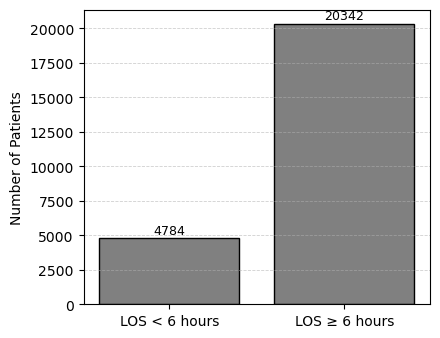

In [ ]:
import matplotlib.pyplot as plt

# Hitung distribusi berdasarkan threshold 6 jam
counts = [
    (data["max_los"] == 1).sum(),
    (data["max_los"] == 0).sum()
]

labels = ['LOS < 6 hours', 'LOS ≥ 6 hours']

plt.figure(figsize=(4.5, 3.5))
bars = plt.bar(labels, counts, color='gray', edgecolor='black')

plt.ylabel('Number of Patients')
plt.title('')
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 120,
             f'{height}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



======FITUR NUMERIK======


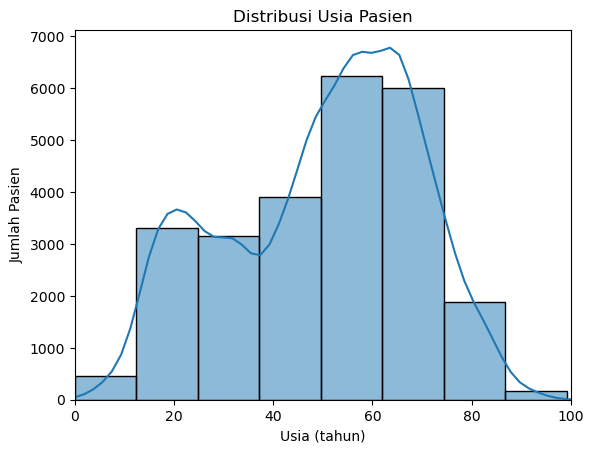

======FITUR KATEGORIK======


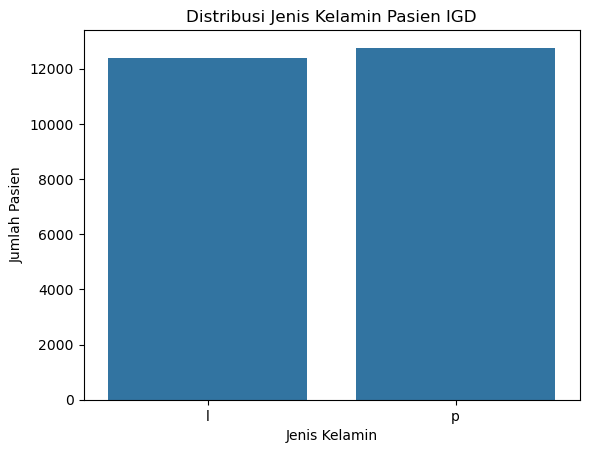

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("======FITUR NUMERIK======")
# Distribusi usia
sns.histplot(data['usia_tahun'], kde=True, bins=30)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia (tahun)")
plt.ylabel("Jumlah Pasien")
plt.xlim(0, 100)   # Batasi tampilan sumbu X agar lebih jelas
plt.show()

print("======FITUR KATEGORIK======")
# Distribusi Jenis Kelamin
sns.countplot(x='jenis_kelamin', data=data)
plt.title("Distribusi Jenis Kelamin Pasien IGD")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Pasien")
plt.show()


# 2. Data Preprocessing / Cleaning
Tahap preprocessing dilakukan untuk menyiapkan data agar siap digunakan dalam analisis lanjutan dan pemodelan.
Proses ini meliputi Penanganan Missing Values,  Pembersihan data, transformasi format, dan pembuatan fitur turunan.  


## Step 3 : Multivariate Imputation by Chained Equations (MICE)

Enam variabel klinis utama -> fokus utama veracity handling (≈ 14–20 % hilang)
1. tensi
2. nadi
3. gcs
4. saturasi
5. suhu
6. respirasi

Mengisi missing value pada enam variabel klinis dengan memperhitungkan hubungan antar tanda vital dan variabel kontekstual (usia, jenis kelamin, shift, diagnosis, dsb).

## clinical-aware veracity handling
1. GCS : perlu rekonstruksi format
2. SBP/DBP : perlu parsing
3. Saturasi : perlu threshold cleaning sebelum MICE

In [ ]:
# Parsing tensi

import re
# Membuat tensi menjadi dua kolom numerik
data[['sbp','dbp']] = data['tensi'].astype(str).str.extract(r'(\d+)[/-](\d+)').astype(float)

In [ ]:
#Hapus tensi

data.drop(columns=['tensi'], inplace=True)

In [ ]:
def fix_gcs(x):
    try:
        x = int(x)
        if 100 <= x <= 999:  # format seperti 456
            e = x // 100
            v = (x // 10) % 10
            m = x % 10
            return e + v + m
        elif 3 <= x <= 15:
            return x
        else:
            return np.nan
    except:
        return np.nan

data['gcs_fixed'] = data['gcs'].apply(fix_gcs)

In [ ]:
data['gcs'] = data['gcs_fixed']

# Hapus nilai tidak valid
data['gcs'] = data['gcs'].where(data['gcs'].between(3,15), np.nan)

In [ ]:
import numpy as np

# Ubah ke numerik dulu
data['saturasi'] = pd.to_numeric(data['saturasi'], errors='coerce')

# Baru lakukan cleaning threshold
data['saturasi'] = data['saturasi'].where(
    data['saturasi'].between(60, 100),
    np.nan
)

In [ ]:
#Standarisasi ringan

from sklearn.preprocessing import StandardScaler

# Kolom yang akan diimputasi + konteks
cols_for_impute = ['sbp','dbp','suhu','nadi','respirasi','saturasi','gcs','usia_tahun','jenis_kelamin','kd_customer']

# Konversi kategorikal ke kode angka
data['jenis_kelamin'] = data['jenis_kelamin'].astype('category').cat.codes
data['kd_customer'] = data['kd_customer'].astype('category').cat.codes

# Pastikan numerik semua
data[cols_for_impute] = data[cols_for_impute].apply(pd.to_numeric, errors='coerce')

# Standardisasi
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data[cols_for_impute]), columns=cols_for_impute)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Simpan versi sebelum imputasi
df_original = data.copy()

# Scaling
df_scaled = pd.DataFrame(
    scaler.fit_transform(data[cols_for_impute]),
    columns=cols_for_impute
)

# MICE
mice = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)
imputed_scaled = mice.fit_transform(df_scaled)

# Kembalikan ke skala asli
df_imputed = pd.DataFrame(
    scaler.inverse_transform(imputed_scaled),
    columns=cols_for_impute
)

# Overwrite hanya kolom yang diimputasi
for c in df_imputed.columns:
    data[c] = df_imputed[c]

In [ ]:
data['sbp'] = data['sbp'].clip(70, 220)
data['dbp'] = data['dbp'].clip(40, 130)
data['suhu'] = data['suhu'].clip(33, 42)
data['nadi'] = data['nadi'].clip(30, 200)
data['respirasi'] = data['respirasi'].clip(8, 50)
data['saturasi'] = data['saturasi'].clip(70, 100)
data['gcs'] = data['gcs'].clip(3, 15)

In [ ]:
data[['sbp','dbp','saturasi','gcs','respirasi','suhu']].describe()

,sbp,dbp,saturasi,gcs,respirasi,suhu
count,44280.000000,44280.000000,44280.000000,44280.00000,44280.000000,44280.000000
mean,137.890702,82.320709,97.673233,14.66491,22.225581,36.750170
std,43.627137,25.868274,2.790020,1.31346,8.564122,2.843683
min,70.000000,40.000000,70.000000,3.00000,8.000000,33.000000
25%,111.000000,68.000000,96.931213,15.00000,20.000000,36.000000
50%,131.000000,80.000000,98.000000,15.00000,20.000000,36.000000
75%,161.000000,95.000000,99.541144,15.00000,22.000000,37.000000
max,220.000000,130.000000,100.000000,15.00000,50.000000,42.000000


### Step 4 Konversi kolom WAKTU menjadi jam masuk dan hari dalam minggu /dow

Nantinya waktu_masuk datetime akan di drop dari data.

In [ ]:
print("=== KONVERSI WAKTU MASUK ===\n")

data['waktu_masuk'] = pd.to_datetime(
    data['waktu_masuk'],
    errors='coerce'
)

print(data["waktu_masuk"].head(100))

data['jam_masuk']   = data['waktu_masuk'].dt.hour
data['dow_masuk']   = data['waktu_masuk'].dt.dayofweek

print(data[['waktu_masuk', 'jam_masuk', 'dow_masuk']].head(5))


=== KONVERSI WAKTU MASUK ===

0    2024-11-01 00:33:22
1    2024-11-01 00:41:15
2    2024-11-01 01:11:58
3    2024-11-01 01:51:32
4    2024-11-01 02:43:31
             ...        
95   2024-11-01 22:33:43
96   2024-11-01 22:51:31
97   2024-11-01 23:05:59
98   2024-11-01 23:19:07
99   2024-11-01 23:29:20
Name: waktu_masuk, Length: 100, dtype: datetime64[ns]
          waktu_masuk  jam_masuk  dow_masuk
0 2024-11-01 00:33:22          0          4
1 2024-11-01 00:41:15          0          4
2 2024-11-01 01:11:58          1          4
3 2024-11-01 01:51:32          1          4
4 2024-11-01 02:43:31          2          4


### Step 5 Pseudominasi identitas pasien
kd_pasien salah satu informasi rekam medis yang harus dijaga
Perlu dilakukan pseudominasi. kd_pasien untuk menghitung frequent, nantinya kd_pasien/pasien_id akan di drop dari data model

Menggunakan fungsi hashlib.sha256

In [ ]:
import hashlib

def pseudo_hash(value, prefix="P", length=6):
    if pd.isna(value) or value == "":
        return None
    h = hashlib.sha256(str(value).encode()).hexdigest()
    return prefix + h[:length]   # ambil 6 karakter awal

#implementasi pseudo_hash
data['pasien_id'] = data['kd_pasien'].apply(lambda x: pseudo_hash(x, prefix="P"))

print(data[['kd_pasien', 'pasien_id']].head())


    kd_pasien pasien_id
0  6-81-44-81   P848473
1  6-90-66-02   P514778
2  6-90-66-03   P7b0ee3
3  6-61-24-68   Pd7b45f
4  6-90-60-76   P38f326


### Step 6 Perhitungan Usia Pasien

A. usia_tahun : deteksi outlier menggunakan metode IQR (Interquartile Range).
                Batas bawah 0 tahun, Batas atas dari Tukeys Rule Q3+1.5×IQR
B. usia_tahun : imputasi NAN dengan median.

In [ ]:
import matplotlib.pyplot as plt

print("A. Cek Outlier \n")
data['usia_tahun'].describe()


A. Cek Outlier 



count    44280.000000
mean        43.800127
std         23.153168
min          0.000000
25%         24.000000
50%         48.000000
75%         63.000000
max        372.000000
Name: usia_tahun, dtype: float64

Jumlah outlier usia sebelum pembersihan: 8

Daftar nilai usia outlier:
[124.0, 124.0, 125.0, 372.0, 125.0, 125.0, 125.0, 125.0]
B. Imputasi Median 

Jumlah outlier usia setelah Imputasi: 0
Jumlah nilai kosong usia_tahun setelah Imputasi: 0


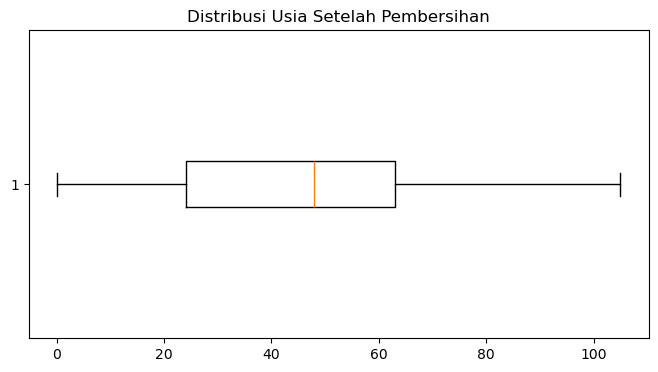

In [ ]:
#buat batas bawah dan atas usia
Q1 = data['usia_tahun'].quantile(0.25)
Q3 = data['usia_tahun'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = max(0, Q1 - 1.5 * IQR)

outlier = data[(data['usia_tahun'] < batas_bawah) | (data['usia_tahun'] > batas_atas)]
print("Jumlah outlier usia sebelum pembersihan:", len(outlier))

# Daftar usia yang termasuk outlier
print("\nDaftar nilai usia outlier:")
print(outlier['usia_tahun'].tolist())

print("B. Imputasi Median \n")
# Outlier sebagai NaN
data.loc[(data['usia_tahun'] < batas_bawah) |
               (data['usia_tahun'] > batas_atas), 'usia_tahun'] = None

#Imputasi NaN dengan median
median_usia = data['usia_tahun'].median()
data.loc[:, 'usia_tahun'] = data['usia_tahun'].fillna(median_usia)

#Cek jumlah outlier setelah imputasi
outliers = data[(data['usia_tahun'] < batas_bawah) | (data['usia_tahun'] > batas_atas)]
print("Jumlah outlier usia setelah Imputasi:", len(outliers))

#Cek jumlah null setelah imputasi
print("Jumlah nilai kosong usia_tahun setelah Imputasi:", data['usia_tahun'].isna().sum())
# Plot sesudah cleaning
plt.figure(figsize=(8,4))
plt.boxplot(data['usia_tahun'].dropna(), vert=False)
plt.title("Distribusi Usia Setelah Pembersihan")
plt.show()

### Step 7 Pembentukan list Diagnosa Penyakit

A. Melakukan cek outlier dan null
B. Memberi tanda dengan tidak tercatat karena daftar_diagnosa tidak bisa diimputasi.
C. daftar_diagnosa dibuat jadi list, yang tidak tercatat list []

In [ ]:
import re

#fungsi buat list diagnosa disatukan
def parse_diagnosa(x):
    if pd.isna(x) or x == "TIDAK TERCATAT":
        return []
    return [d.strip() for d in x.split(';') if d.strip()]

data['diagnosa_list'] = data['daftar_diagnosa'].apply(parse_diagnosa)

#fungsi buat ambil kode icd saja
def ambil_kode_icd(lst):
    return [re.split(r'\s*-\s*', item)[0] for item in lst]

print("A. Cek Null dan Outlies Diagnosa")

# Jumlah nilai kosong
print("Jumlah nilai kosong:", data['daftar_diagnosa'].isna().sum())

# Cek data aneh (misalnya string kosong)
print("Jumlah diagnosa kosong string:", (data['daftar_diagnosa'] == '').sum())

print("B Tanda Khusus Diagnosa Kosong")
data['daftar_diagnosa'] = data['daftar_diagnosa'].fillna("TIDAK TERCATAT")

print("Jumlah 'TIDAK TERCATAT':", (data['daftar_diagnosa'] == "TIDAK TERCATAT").sum())
print(data['daftar_diagnosa'].value_counts().head())

print("C Buat LIST \n")
data['icd_list'] = data['diagnosa_list'].apply(ambil_kode_icd)
print("Contoh hasil parsing diagnosa:")
print(data[['daftar_diagnosa', 'diagnosa_list', 'icd_list']].head(5))

A. Cek Null dan Outlies Diagnosa
Jumlah nilai kosong: 3964
Jumlah diagnosa kosong string: 0
B Tanda Khusus Diagnosa Kosong
Jumlah 'TIDAK TERCATAT': 3964
daftar_diagnosa
TIDAK TERCATAT                                  3964
R10.4 - Other and unspecified abdominal pain    2184
R50.9 - Fever, unspecified                      1265
K30 - Dyspepsia                                 1014
J45.9 - Asthma, unspecified                      760
Name: count, dtype: int64
C Buat LIST 

Contoh hasil parsing diagnosa:
                                     daftar_diagnosa  \
0                                     TIDAK TERCATAT   
1                                     TIDAK TERCATAT   
2       R10.4 - Other and unspecified abdominal pain   
3             I10 - Essential (primary) hypertension   
4  B90.9 - Sequelae of respiratory and unspecifie...   

                                       diagnosa_list  \
0                                                 []   
1                                             

### Step 8 Pembentukan list Tindakan

A. Melakukan cek outlier dan null
B. Memberi tanda dengan tidak tercatat karena daftar_tindakan tidak bisa diimputasi.
C. daftar_tindakan dibuat jadi list, yang tidak tercatat list []

In [ ]:
import re
import pandas as pd

#fungsi buat list tindakan disatukan
def parse_produk(x):
    if pd.isna(x) or x.strip() == "" or x == "TIDAK TERCATAT":
        return []
    return [p.strip() for p in x.split(';') if p.strip]

#fungsi buat list ICD nya saja
def ambil_kode_produk(lst):
    return [re.split(r'\s*-\s*', item)[0] for item in lst]

data['daftar_produk'] = data['daftar_produk'].fillna('TIDAK TERCATAT')
data['produk_list'] = data['daftar_produk'].apply(parse_produk)
data['kode_produk_list'] = data['produk_list'].apply(ambil_kode_produk)

print(data[['daftar_produk', 'produk_list', 'kode_produk_list']].head(5))



                                       daftar_produk  \
0  10715 - KONSULTASI; 10767 - DRIP OBAT; 6440 - ...   
1  10715 - KONSULTASI; 1093 - Biaya Radiologi; 64...   
2       10715 - KONSULTASI; 6440 - Biaya Obat Apotek   
3  10715 - KONSULTASI; 10767 - DRIP OBAT; 1092 - ...   
4  10715 - KONSULTASI; 10767 - DRIP OBAT; 10908 -...   

                                         produk_list  \
0  [10715 - KONSULTASI, 10767 - DRIP OBAT, 6440 -...   
1  [10715 - KONSULTASI, 1093 - Biaya Radiologi, 6...   
2     [10715 - KONSULTASI, 6440 - Biaya Obat Apotek]   
3  [10715 - KONSULTASI, 10767 - DRIP OBAT, 1092 -...   
4  [10715 - KONSULTASI, 10767 - DRIP OBAT, 10908 ...   

              kode_produk_list  
0         [10715, 10767, 6440]  
1          [10715, 1093, 6440]  
2                [10715, 6440]  
3   [10715, 10767, 1092, 6440]  
4  [10715, 10767, 10908, 6440]  


Dari List Diagnosa dan tindakan akan ditentukan jumlah diagnosa dan jumlah tindakan. Nantinya List diagnosa dan tindakan akan dihapus

In [ ]:
import pandas as pd
import ast

# Ubah kolom list (string) menjadi list numerik
def safe_to_list(val):
    if isinstance(val, list):
        return val
    if pd.isna(val):
        return []
    s = str(val).strip()
    if s.startswith('[') and s.endswith(']'):
        try:
            return ast.literal_eval(s)
        except Exception:
            pass
    if '|' in s:
        return [x for x in s.split('|') if x]
    if ',' in s:
        return [x.strip() for x in s.split(',') if x.strip()]
    return [s] if s else []

for col in ['diagnosa_list','icd_list','produk_list','kode_produk_list']:
    data[col] = data[col].apply(safe_to_list)

# fitur ringkasan numerik (jumlah item)
data['jumlah_diagnosa'] = data['diagnosa_list'].apply(len)
data['jumlah_tindakan'] = data['produk_list'].apply(len)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44280 entries, 0 to 44279
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   waktu_masuk       44280 non-null  datetime64[ns]
 1   kd_pasien         44280 non-null  object        
 2   kd_dokter         44280 non-null  int64         
 3   jenis_kelamin     44280 non-null  float64       
 4   kd_customer       44280 non-null  float64       
 5   usia_tahun        44280 non-null  float64       
 6   max_los           44280 non-null  int64         
 7   daftar_diagnosa   44280 non-null  object        
 8   daftar_produk     44280 non-null  object        
 9   suhu              44280 non-null  float64       
 10  nadi              44280 non-null  float64       
 11  respirasi         44280 non-null  float64       
 12  saturasi          44280 non-null  float64       
 13  gcs               44280 non-null  float64       
 14  sbp               4428

# 3. Structured Feature Engineering – Model A (Baseline)

Tahap ini bertujuan membangun representasi fitur terstruktur (structured feature abstraction) dari data mentah ED yang sebagian besar masih bertipe teks (`object`).  Setiap variabel ditransformasikan melalui proses ekstraksi, agregasi, dan encoding yang dirancang secara sistematis untuk menghasilkan sinyal prediktif terhadap prolonged Length of Stay (LOS).
Model A berfungsi sebagai baseline struktural sebelum penambahan interaksi berbasis klinisi (Model B).
Transformasi dilakukan dalam beberapa komponen utama sebagai berikut:

#### 3.1 Transformasi Fitur Historis Pasien

Fitur historis dirancang untuk menangkap pola utilisasi layanan sebelumnya dan kompleksitas riwayat klinis pasien, tujuannya adalah memodelkan efek temporal dan rekuren terhadap risiko LOS berkepanjangan.

#### 3.2 Transformasi Variabel Waktu dan Operasional

Variabel waktu mentah seperti `waktu_masuk`, `jam_masuk`, dan `dow_masuk` ditransformasikan menjadi fitur operasional yang merepresentasikan dinamika layanan IGD, Transformasi ini bertujuan menangkap efek crowding dan variasi beban layanan terhadap LOS.

#### 3.3 Transformasi Data Diagnosa

Kolom berbasis teks seperti `diagnosa_list` diproses menjadi representasi numerik, pendekatan ini untuk mengurangi sparsity sekaligus mempertahankan makna klinis.

#### 3.4 Transformasi Data Tindakan

Data tindakan (`produk_list`) dikelompokkan menggunakan pendekatan regex berbasis domain menjadi kategori klinis, selain itu juga dihitung agregasi numerik seperti `jumlah_tindakan`. Fitur ini merepresentasikan intensitas intervensi medis.

#### 3.5 Konversi Variabel Klinis Bertipe Object

Variabel klinis yang awalnya bertipe teks dikonversi menjadi format numerik terstandarisasi, termasuk:
- Vital signs (suhu, nadi, respirasi)
- Skor kesadaran (GCS)
- Tekanan darah (SBP, DBP)

#### 3.6 Encoding Variabel Kategorikal

Variabel kategorikal seperti dikodekan menjadi representasi numerik yang sesuai untuk model berbasis tree.

Model A (Baseline) merepresentasikan pendekatan struktural murni tanpa interaksi eksplisit antar-domain.  
Tahap selanjutnya (Model B) akan memperluas baseline ini dengan penambahan clinician-guided feature interaction.



### Step 9 Transformasi Fitur Historis Pasien
Fitur historis dirancang untuk menangkap pola utilisasi layanan sebelumnya dan kompleksitas riwayat klinis pasien, meliputi:

- `visit_count_prev`
- `avg_los_prev`
- `last_los_prev`
- `max_los_prev`
- `unique_dx_count_prev`
- `is_frequent_visitor`

Tujuannya adalah memodelkan efek temporal dan rekuren terhadap risiko LOS berkepanjangan.



In [ ]:
#mengurutkan data pasien dan waktu
data = data.sort_values(['pasien_id', 'waktu_masuk']).reset_index(drop=True)


In [ ]:
def cumulative_nunique_prev(series):
    seen = set()
    out = []
    for val in series:
        out.append(len(seen))
        if pd.notna(val):
            seen.add(val)
    return out


#sudah visit sebelumnya
data['visit_count_prev'] = (
    data.groupby('pasien_id').cumcount()
)

#sering visit sebelumnya
data['is_frequent_visitor'] = (data['visit_count_prev'] >= 3).astype(int)

#rata-rata LOS sebelumnya
data['avg_los_prev'] = (
    data.groupby('pasien_id')['max_los']
      .apply(lambda x: x.shift(1).expanding().mean())
      .reset_index(level=0, drop=True)
)

#los terakhir sebelumnya
data['last_los_prev'] = (
    data.groupby('pasien_id')['max_los']
      .shift(1)
)

#LOs maksimum sebelumnya
data['max_los_prev'] = (
    data.groupby('pasien_id')['max_los']
      .apply(lambda x: x.shift(1).expanding().max())
      .reset_index(level=0, drop=True)
)

#diagnosa sebelumnya
data['unique_dx_count_prev'] = (
    data.groupby('pasien_id')['jumlah_diagnosa']
        .transform(cumulative_nunique_prev)
)


#handling nan kunjungan pertama
hist_cols = [
    'visit_count_prev',
    'is_frequent_visitor',
    'avg_los_prev',
    'last_los_prev',
    'max_los_prev',
    'unique_dx_count_prev'
]

data[hist_cols] = data[hist_cols].fillna(0)


### Step 10. Transformasi Variabel Waktu dan Beban Operasional

Transformasi ini bertujuan menangkap efek crowding dan variasi beban layanan terhadap LOS,
dilakukan rekayasa fitur berbasis waktu kedatangan pasien (`waktu_masuk`).

#### 1. Dynamic Arrival Load (4-hour Rolling Window)
Untuk merepresentasikan tingkat kepadatan layanan saat pasien datang, dihitung jumlah kedatangan dalam 4 jam terakhir menggunakan rolling time window:
- `load_4h` → jumlah pasien yang datang dalam 4 jam sebelum waktu masuk pasien saat ini.
Fitur ini berfungsi sebagai proxy beban operasional dan crowding IGD.
Selain itu dibuat kategorisasi:
- `load_category` (0–3) → Rendah, Sedang, Tinggi, Sangat Tinggi
Namun model utama menggunakan nilai kontinu `load_4h` untuk mempertahankan granularitas informasi.

#### 2. Shift Kedatangan
Berdasarkan jam kedatangan, dibentuk variabel:
- 07.00–14.00 → Pagi (0)
- 15.00–21.00 → Siang (1)
- 21.00–06.59 → Malam (2)

Fitur ini menangkap variasi staffing dan dinamika operasional antar shift.

#### 3. Fitur Waktu Tambahan (Opsional)

Dari `dow_masuk` dapat dibentuk:
- `weekend_flag`
- `jam_peak_flag` berdasarkan distribusi empiris load tertinggi.

Fitur waktu ini digunakan untuk menangkap efek operasional terhadap peningkatan risiko LOS ≥ 6 jam.


           waktu_masuk  load_4h load_category
0  2024-11-01 00:33:22      1.0             0
1  2024-11-01 00:41:15      2.0             0
2  2024-11-01 01:11:58      3.0             0
3  2024-11-01 01:51:32      4.0             0
4  2024-11-01 02:43:31      5.0             0
5  2024-11-01 02:51:48      6.0             0
6  2024-11-01 03:11:57      7.0             0
7  2024-11-01 03:15:27      8.0             0
8  2024-11-01 05:06:09      7.0             0
9  2024-11-01 05:08:29      8.0             0
10 2024-11-01 05:10:40      9.0             0
11 2024-11-01 05:53:45      8.0             0
12 2024-11-01 05:56:58      9.0             0
13 2024-11-01 06:23:42     10.0             0
14 2024-11-01 07:28:20      7.0             0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44280 entries, 0 to 44279
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   waktu_masuk             44280 

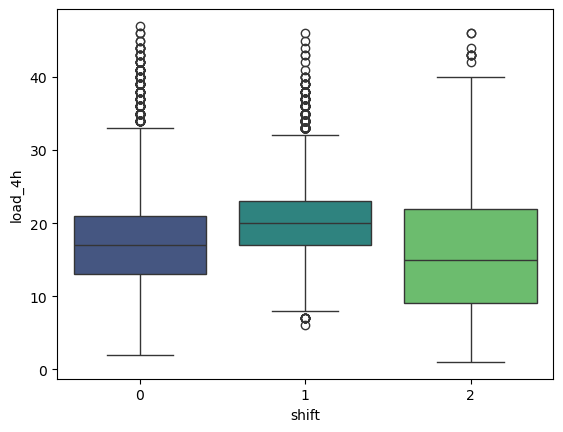

In [ ]:
# membuat waktu_masuk bertipe datetime
data['waktu_masuk'] = pd.to_datetime(data['waktu_masuk'], errors='coerce')

# urutkan data berdasarkan waktu_masuk
data = data.sort_values('waktu_masuk').reset_index(drop=True)

# buat DataFrame untuk menghitung beban kedatangan
arrivals = data[['waktu_masuk']].copy()
arrivals['count'] = 1

# set waktu_masuk sebagai index agar bisa pakai rolling time window
arrivals = arrivals.set_index('waktu_masuk')

# hitung jumlah kedatangan dalam 4 jam terakhir
arrivals['arr_4h'] = arrivals['count'].rolling('4h').sum()

# gabungkan hasilnya kembali ke data
data['load_4h'] = arrivals['arr_4h'].values
data['load_4h'] = data['load_4h'].fillna(1)

data['load_category'] = pd.cut(
    data['load_4h'],
    bins=[0, 10, 30, 60, 100],
    labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
)
load_map = {
    'Rendah': 0,
    'Sedang': 1,
    'Tinggi': 2,
    'Sangat Tinggi': 3
}

data['load_category'] = data['load_category'].map(load_map)


print(data[['waktu_masuk','load_4h','load_category']].head(15))

def get_shift(hour):
    if 7 <= hour < 14:
        return 'Pagi'
    elif 14 <= hour < 21:
        return 'Siang'
    else:
        return 'Malam'

data['shift'] = data['waktu_masuk'].dt.hour.apply(get_shift)

shift_map = {
    'Pagi': 0,
    'Siang': 1,
    'Malam': 2
}

data['shift'] = data['shift'].map(shift_map)


sns.boxplot(x='shift', y='load_4h', data=data, palette='viridis')

#weekend flag
data['weekend_flag'] = data['waktu_masuk'].dt.dayofweek.apply(lambda x: 1 if x >=5 else 0)

#jam sibuk flag
threshold_peak = data['load_4h'].quantile(0.75)
data['jam_peak_flag'] = (data['load_4h'] >= threshold_peak).astype(int)

#interaksi load 4 h dan shift
data['shift_load_interaction'] = data['shift'] * data['load_4h']

data.info()

### Step 11. Transformasi Data Diagnosa

Pada tahap ini dilakukan transformasi kolom diagnosa berbasis teks menjadi representasi numerik terstruktur menggunakan pendekatan berbasis ICD-10.

#### 1. Ekstraksi Kode ICD-10

Dari setiap item diagnosa (misal: `K56.7 - Ileus`), dilakukan ekstraksi kode ICD menggunakan regular expression:
- Pola regex: `^[A-Z]\d{1,2}\.?[0-9A-Z]*`
- Hanya bagian kode yang disimpan
Output:
- `diag_codes` → list kode ICD per pasien
- `primary_diag` → kode ICD utama (elemen pertama)
Pendekatan ini memastikan konsistensi standar ICD.

#### 2. Abstraksi Klinis Berbasis Chapter ICD-10

Untuk mengurangi sparsity dan menjaga stabilitas model, dilakukan pengelompokan diagnosa berdasarkan huruf bab ICD-10.
Dibentuk fitur biner (0/1):

- `dx_infeksi` (A–B)
- `dx_neoplasma` (C–D)
- `dx_endokrin` (E)
- `dx_darah` (D)
- `dx_psikiatri` (F)
- `dx_neuro` (G)
- `dx_mata` (H)
- `dx_cardiac` (I)
- `dx_respir` (J)
- `dx_digest` (K)
- `dx_skin` (L)
- `dx_musculo` (M)
- `dx_genito` (N)
- `dx_perinatal` (P)
- `dx_kongenital` (Q)
- `dx_gejala` (R)
- `dx_trauma` (S–T)
- `dx_eksternal` (V–Z)

Fitur ini merepresentasikan domain klinis utama yang berpotensi memengaruhi durasi rawat (LOS).

#### 3. Top-N Primary Diagnosis Encoding

Untuk mempertahankan granularitas diagnosa spesifik yang paling sering muncul, dilakukan:

- Identifikasi 25 kode primary ICD paling sering muncul
- Dibuat fitur biner untuk masing-masing kode:

  `pd_<ICD_CODE>`

Pendekatan ini memungkinkan model menangkap efek diagnosa dominan tanpa meningkatkan dimensi fitur secara berlebihan.


In [ ]:
import re
import pandas as pd
import numpy as np

def to_list_safe(x):
    """Ubah string 'A;B;C' atau NaN jadi list bersih."""
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    # Pecah pakai ';' lalu strip
    parts = [p.strip() for p in str(x).split(';') if str(p).strip()!='']
    return parts

data['diagnosa_list'] = data['diagnosa_list'].apply(to_list_safe)
data['produk_list']   = data['produk_list'].apply(to_list_safe)

# Ambil KODE ICD dari 'K56.7 - xxx'
def icd_code_only(item):
    m = re.match(r'^([A-Z]\d{1,2}\.?[0-9A-Z]*)', str(item).strip())
    return m.group(1) if m else None

data['diag_codes'] = data['diagnosa_list'].apply(lambda lst: [icd_code_only(i) for i in lst if icd_code_only(i)])

data['primary_diag'] = data['diag_codes'].apply(lambda lst: lst[0] if len(lst)>0 else None)

# Flag kategori ICD (berbasis huruf bab ICD-10)
def has_chapter(codes, letters):
    return int(any((c and c[0] in letters) for c in codes))

data['dx_infeksi']   = data['diag_codes'].apply(lambda c: has_chapter(c, set('AB')))
data['dx_neoplasma'] = data['diag_codes'].apply(lambda c: has_chapter(c, set('CD')))
data['dx_endokrin']  = data['diag_codes'].apply(lambda c: has_chapter(c, set('E')))
data['dx_darah']     = data['diag_codes'].apply(lambda c: has_chapter(c, set('D')))
data['dx_psikiatri'] = data['diag_codes'].apply(lambda c: has_chapter(c, set('F')))
data['dx_neuro']     = data['diag_codes'].apply(lambda c: has_chapter(c, set('G')))
data['dx_mata']      = data['diag_codes'].apply(lambda c: has_chapter(c, set('H')))
data['dx_cardiac']   = data['diag_codes'].apply(lambda c: has_chapter(c, set('I')))
data['dx_respir']    = data['diag_codes'].apply(lambda c: has_chapter(c, set('J')))
data['dx_digest']    = data['diag_codes'].apply(lambda c: has_chapter(c, set('K')))
data['dx_skin']      = data['diag_codes'].apply(lambda c: has_chapter(c, set('L')))
data['dx_musculo']   = data['diag_codes'].apply(lambda c: has_chapter(c, set('M')))
data['dx_genito']    = data['diag_codes'].apply(lambda c: has_chapter(c, set('N')))
data['dx_perinatal'] = data['diag_codes'].apply(lambda c: has_chapter(c, set('P')))
data['dx_kongenital']= data['diag_codes'].apply(lambda c: has_chapter(c, set('Q')))
data['dx_gejala']    = data['diag_codes'].apply(lambda c: has_chapter(c, set('R')))
data['dx_trauma']    = data['diag_codes'].apply(lambda c: has_chapter(c, set('ST')))
data['dx_eksternal'] = data['diag_codes'].apply(lambda c: has_chapter(c, set('VWXYZ')))

TOPN = 25
top_primary = (
    data['primary_diag'].value_counts().head(TOPN).index.tolist()
)
for code in top_primary:
    data[f'pd_{code}'] = (data['primary_diag']==code).astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44280 entries, 0 to 44279
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   waktu_masuk             44280 non-null  datetime64[ns]
 1   kd_pasien               44280 non-null  object        
 2   kd_dokter               44280 non-null  int64         
 3   jenis_kelamin           44280 non-null  float64       
 4   kd_customer             44280 non-null  float64       
 5   usia_tahun              44280 non-null  float64       
 6   max_los                 44280 non-null  int64         
 7   daftar_diagnosa         44280 non-null  object        
 8   daftar_produk           44280 non-null  object        
 9   suhu                    44280 non-null  float64       
 10  nadi                    44280 non-null  float64       
 11  respirasi               44280 non-null  float64       
 12  saturasi                44280 non-null  float6

### Step 12  Transformasi Data Tindakan

Kolom berbasis teks seperti:
- `produk_list`
- `daftar_produk`
- `kode_produk_list`

ditransformasikan menjadi fitur numerik menggunakan pendekatan rule-based regex grouping. Tujuan transformasi ini adalah membangun representasi intensitas dan kompleksitas intervensi medis di IGD.

#### 1 Kategorisasi Tindakan Utama

Dilakukan pencarian pola berbasis keyword medis untuk membentuk fitur biner (0/1):

- `tind_operasi` → tindakan bedah (operasi, laparotomi, ORIF, amputasi, dll)
- `tind_airway` → tindakan airway management (intubasi, ventilator, CPAP, dll)
- `tind_transfusi` → transfusi darah
- `tind_imaging` → CT-Scan, MRI, USG, rontgen
- `tind_abx_iv` → antibiotik intravena
- `tind_nebul` → terapi nebulisasi
- `tind_observ` → observasi / monitoring
- `tind_lab_kompleks` → lab kompleks (BGA, Troponin, D-Dimer, dll)

#### 2 Tindakan Mayor

Dibentuk fitur agregat:
- `tindakan_mayor`
yang bernilai 1 jika pasien menjalani:
- Operasi
- Airway management
- Transfusi
Fitur ini merepresentasikan intervensi invasif atau high-risk procedure yang berpotensi meningkatkan LOS.


In [ ]:
def any_kw(lst, patterns):
    s = ' ; '.join([str(x).upper() for x in lst])
    return int(any(re.search(pat, s) for pat in patterns))

# Pola regex
PAT_OPERASI   = [r'OPERAS', r'LAPAROT', r'ORIF', r'CRANI', r'AMPUT', r'DEBRID', r'SECTIO', r'APPEND', r'NECRO']
PAT_AIRWAY    = [r'INTUB', r'ETT', r'VENTILATOR', r'CPAP', r'BIPAP']
PAT_TRANSFUSI = [r'TRANSFUS', r'PRC', r'WB', r'PLT', r'FFP']
PAT_IMAGING   = [r'CT[- ]?SCAN', r'MRI', r'ANGIO', r'USG', r'ULTRAS', r'RONTGEN', r'RADIOG', r'X[- ]?RAY']
PAT_ABX_IV    = [r'CEFTRI', r'CEFTAZ', r'MEROPEN', r'PIPERACIL', r'AMPICIL', r'GENTAM', r'LEVOFLOX', r'CIPROFLOX']
PAT_NEBUL     = [r'NEBUL', r'NEBULIZER', r'SALBUTAMOL', r'IPRATROPIUM']
PAT_OBS       = [r'OBSERVASI', r'OBS', r'MONITOR', r'WATCHFUL']
PAT_LAB_KOMPL = [r'BGA', r'GAS DARAH', r'TROPONIN', r'D-DIMER', r'PROCAL', r'CRP']

data['tind_operasi']   = data['produk_list'].apply(lambda x: any_kw(x, PAT_OPERASI))
data['tind_airway']    = data['produk_list'].apply(lambda x: any_kw(x, PAT_AIRWAY))
data['tind_transfusi'] = data['produk_list'].apply(lambda x: any_kw(x, PAT_TRANSFUSI))
data['tind_imaging']   = data['produk_list'].apply(lambda x: any_kw(x, PAT_IMAGING))
data['tind_abx_iv']    = data['produk_list'].apply(lambda x: any_kw(x, PAT_ABX_IV))
data['tind_nebul']     = data['produk_list'].apply(lambda x: any_kw(x, PAT_NEBUL))
data['tind_observ']    = data['produk_list'].apply(lambda x: any_kw(x, PAT_OBS))
data['tind_lab_kompleks'] = data['produk_list'].apply(lambda x: any_kw(x, PAT_LAB_KOMPL))

# tindakan mayor
data['tindakan_mayor'] = ((data['tind_operasi']|data['tind_airway']|data['tind_transfusi']).astype(int))
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44280 entries, 0 to 44279
Data columns (total 92 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   waktu_masuk             44280 non-null  datetime64[ns]
 1   kd_pasien               44280 non-null  object        
 2   kd_dokter               44280 non-null  int64         
 3   jenis_kelamin           44280 non-null  float64       
 4   kd_customer             44280 non-null  float64       
 5   usia_tahun              44280 non-null  float64       
 6   max_los                 44280 non-null  int64         
 7   daftar_diagnosa         44280 non-null  object        
 8   daftar_produk           44280 non-null  object        
 9   suhu                    44280 non-null  float64       
 10  nadi                    44280 non-null  float64       
 11  respirasi               44280 non-null  float64       
 12  saturasi                44280 non-null  float6

### Step 13. Encoding Variabel Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cols in ['load_category']:
    data[cols] = le.fit_transform(data[cols].astype(str))


### Step 14. TEMPORAL ROLLING

Asumsi:

Kolom tanggal = waktu_masuk

Sudah dalam format datetime

Target = max_los (0/1)

Feature matrix = X

Target vector = y

In [ ]:
data = data.sort_values('waktu_masuk')
data['month'] = data['waktu_masuk'].dt.to_period('M')

In [ ]:
months = sorted(data['month'].unique())

In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    average_precision_score,
    brier_score_loss
)
from sklearn.calibration import calibration_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results = []

# simpan semua test untuk calibration global
all_y_test = []
all_y_proba = []

# target
target = 'max_los'

# fitur (hindari leakage)
features = [col for col in data.columns
            if col not in ['max_los', 'waktu_masuk', 'month','kd_pasien']]

for i in range(6, len(months)):

    train_months = months[:i]
    test_month = months[i]

    train_datam = data[data['month'].isin(train_months)]
    test_datam = data[data['month'] == test_month]

    X_trainm = train_datam[features]
    y_trainm = train_datam[target]

    X_testm = test_datam[features]
    y_testm = test_datam[target]

    # SMOTE hanya training
    sm = SMOTE(random_state=42)
    X_train_resm, y_train_resm = sm.fit_resample(X_trainm, y_trainm)

    modelm = LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    modelm.fit(X_train_resm, y_train_resm)

    y_probam = modelm.predict_proba(X_testm)[:,1]
    y_predm = (y_probam >= 0.30).astype(int)

    # ========================
    # METRICS
    # ========================
    aucm = roc_auc_score(y_testm, y_probam)
    pr_aucm = average_precision_score(y_testm, y_probam)
    recallm = recall_score(y_testm, y_predm)
    precisionm = precision_score(y_testm, y_predm)
    brierm = brier_score_loss(y_testm, y_probam)

    results.append({
        "test_month": str(test_month),
        "AUC": aucm,
        "PR_AUC": pr_aucm,
        "Recall": recallm,
        "Precision": precisionm,
        "Brier": brierm,
        "n_test": len(test_datam)
    })

    # simpan untuk calibration global
    all_y_test.extend(y_testm)
    all_y_proba.extend(y_probam)


[LightGBM] [Info] Number of positive: 14205, number of negative: 14205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4149
[LightGBM] [Info] Number of data points in the train set: 28410, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16527, number of negative: 16527
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 33054, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 18859, number of neg

  test_month       AUC    PR_AUC    Recall  Precision     Brier  n_test
0    2025-05  0.755791  0.319113  0.554187   0.308642  0.122834    2728
1    2025-06  0.766782  0.314506  0.556675   0.314815  0.118120    2729
2    2025-07  0.715366  0.399772  0.498162   0.389368  0.156349    2519
3    2025-08  0.725339  0.338036  0.500000   0.322122  0.142974    2715
4    2025-09  0.790160  0.476496  0.638191   0.419604  0.137137    2851
5    2025-10  0.751438  0.344062  0.617204   0.325397  0.130064    2856
6    2025-11  0.780119  0.349818  0.612658   0.320955  0.114611    2721
7    2025-12  0.794890  0.374344  0.631169   0.321004  0.109733    2755
8    2026-01  0.789340  0.379670  0.602906   0.353191  0.113348    2727
9    2026-02  0.797824  0.399447  0.646840   0.352227  0.114541    1777

Mean AUC: 0.7667048048316588
Std AUC: 0.029257981975156496

Mean PR-AUC: 0.36952635243827237
Std PR-AUC: 0.04827683767649312

Mean Recall: 0.585799205236862
Std Recall: 0.05519558115902527

Mean Brier Score:

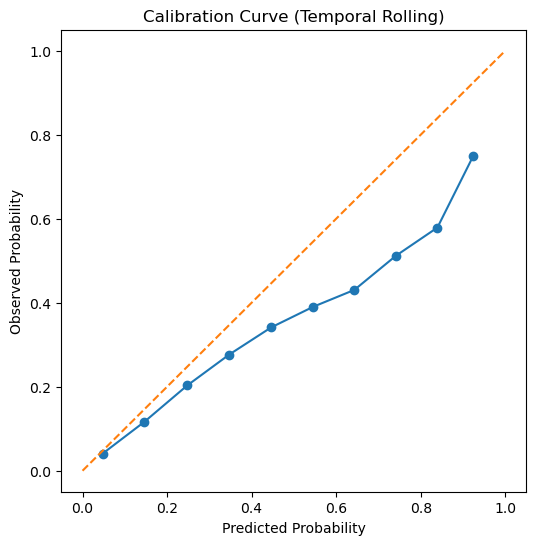

In [ ]:
# ========================
# ROLLING RESULTS
# ========================
results_df = pd.DataFrame(results)
print(results_df)

print("\nMean AUC:", results_df['AUC'].mean())
print("Std AUC:", results_df['AUC'].std())

print("\nMean PR-AUC:", results_df['PR_AUC'].mean())
print("Std PR-AUC:", results_df['PR_AUC'].std())

print("\nMean Recall:", results_df['Recall'].mean())
print("Std Recall:", results_df['Recall'].std())

print("\nMean Brier Score:", results_df['Brier'].mean())

# ========================
# CALIBRATION CURVE
# ========================
prob_true, prob_pred = calibration_curve(all_y_test, all_y_proba, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Probability")
plt.title("Calibration Curve (Temporal Rolling)")
plt.show()

[LightGBM] [Info] Number of positive: 14205, number of negative: 14205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4149
[LightGBM] [Info] Number of data points in the train set: 28410, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16527, number of negative: 16527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 33054, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 18859, number of neg

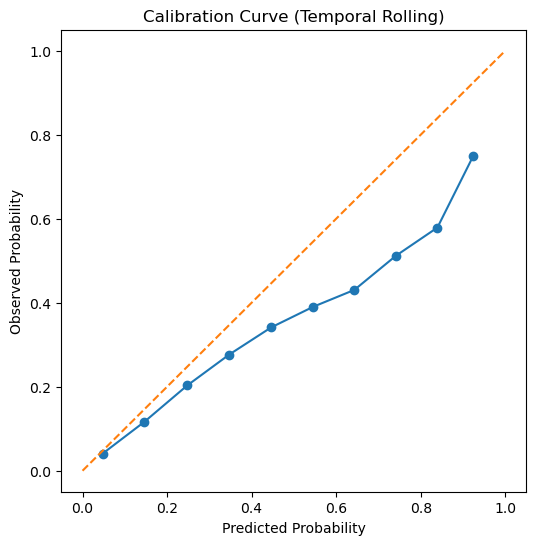


GLOBAL CALIBRATION
Calibration Intercept: -0.5428778627521303
Calibration Slope: 0.8274940310768122
Confidence Interval:
[[-0.58926468 -0.49649105]
 [ 0.79527752  0.85971054]]

CALIBRATION PER MONTH
     month  intercept     slope
0  2025-05  -0.735265  0.719327
1  2025-06  -0.643535  0.814335
2  2025-07  -0.385391  0.596105
3  2025-08  -0.572938  0.689442
4  2025-09  -0.175923  0.979222
5  2025-10  -0.695384  0.809211
6  2025-11  -0.583832  0.969863
7  2025-12  -0.559138  1.033862
8  2026-01  -0.447531  0.977613
9  2026-02  -0.571768  0.951436


In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    average_precision_score,
    brier_score_loss
)
from sklearn.calibration import calibration_curve
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results = []
all_y_test = []
all_y_proba = []
all_test_records = []

# ========================
# TARGET & FEATURES
# ========================
target = 'max_los'

features = [col for col in data.columns
            if col not in ['max_los', 'waktu_masuk', 'month','kd_pasien']]

# ========================
# TEMPORAL ROLLING
# ========================
for i in range(6, len(months)):

    train_months = months[:i]
    test_month = months[i]

    train_datam = data[data['month'].isin(train_months)]
    test_datam = data[data['month'] == test_month]

    X_trainm = train_datam[features]
    y_trainm = train_datam[target]

    X_testm = test_datam[features]
    y_testm = test_datam[target]

    # ✅ SMOTE hanya di training (rename variabel jadi smote)
    smote = SMOTE(random_state=42)
    X_train_resm, y_train_resm = smote.fit_resample(X_trainm, y_trainm)

    modelm = LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    modelm.fit(X_train_resm, y_train_resm)

    y_probam = modelm.predict_proba(X_testm)[:,1]
    y_predm = (y_probam >= 0.30).astype(int)

    # ========================
    # METRICS
    # ========================
    aucm = roc_auc_score(y_testm, y_probam)
    pr_aucm = average_precision_score(y_testm, y_probam)
    recallm = recall_score(y_testm, y_predm)
    precisionm = precision_score(y_testm, y_predm)
    brierm = brier_score_loss(y_testm, y_probam)

    results.append({
        "test_month": str(test_month),
        "AUC": aucm,
        "PR_AUC": pr_aucm,
        "Recall": recallm,
        "Precision": precisionm,
        "Brier": brierm,
        "n_test": len(test_datam)
    })

    # simpan untuk calibration global
    all_y_test.extend(y_testm)
    all_y_proba.extend(y_probam)

    # simpan detail untuk calibration per bulan
    for yt, yp in zip(y_testm, y_probam):
        all_test_records.append({
            "test_month": str(test_month),
            "y_true": yt,
            "y_pred": yp
        })

# ========================
# SUMMARY RESULTS
# ========================
results_df = pd.DataFrame(results)
print(results_df)

print("\nMean AUC:", results_df['AUC'].mean())
print("Std AUC:", results_df['AUC'].std())

print("\nMean PR-AUC:", results_df['PR_AUC'].mean())
print("Std PR-AUC:", results_df['PR_AUC'].std())

print("\nMean Recall:", results_df['Recall'].mean())
print("Std Recall:", results_df['Recall'].std())

print("\nMean Brier Score:", results_df['Brier'].mean())

# ========================
# CALIBRATION CURVE
# ========================
prob_true, prob_pred = calibration_curve(all_y_test, all_y_proba, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Probability")
plt.title("Calibration Curve (Temporal Rolling)")
plt.show()

# ========================
# GLOBAL CALIBRATION SLOPE & INTERCEPT
# ========================
df_test = pd.DataFrame(all_test_records)

y_true = df_test["y_true"].values
y_pred_proba = df_test["y_pred"].values

eps = 1e-6
p = np.clip(y_pred_proba, eps, 1 - eps)

logit_p = np.log(p / (1 - p))
X = sm.add_constant(logit_p)

model = sm.Logit(y_true, X)
result = model.fit(disp=0)

print("\nGLOBAL CALIBRATION")
print("Calibration Intercept:", result.params[0])
print("Calibration Slope:", result.params[1])
print("Confidence Interval:")
print(result.conf_int())

# ========================
# CALIBRATION PER MONTH
# ========================
calibration_results = []

for month in df_test["test_month"].unique():
    df_m = df_test[df_test["test_month"] == month]

    y_true_m = df_m["y_true"].values
    y_pred_proba_m = df_m["y_pred"].values

    p_m = np.clip(y_pred_proba_m, eps, 1 - eps)
    logit_p_m = np.log(p_m / (1 - p_m))

    X_m = sm.add_constant(logit_p_m)
    model_m = sm.Logit(y_true_m, X_m)
    result_m = model_m.fit(disp=0)

    calibration_results.append({
        "month": month,
        "intercept": result_m.params[0],
        "slope": result_m.params[1]
    })

calibration_df = pd.DataFrame(calibration_results)
print("\nCALIBRATION PER MONTH")
print(calibration_df)

## FINAL CHECKING - CEK SEBELUM PEMODELAN

In [ ]:
data.select_dtypes(include=['object']).columns


Index(['kd_pasien', 'daftar_diagnosa', 'daftar_produk', 'pasien_id',
       'diagnosa_list', 'icd_list', 'produk_list', 'kode_produk_list',
       'diag_codes', 'primary_diag'],
      dtype='object')

In [ ]:
data = data.select_dtypes(exclude=['object'])

In [ ]:
data = data.select_dtypes(exclude=['datetime64[ns]'])

In [ ]:
nan_summary = data.isna().sum().sort_values(ascending=False)
nan_summary[nan_summary > 0]


gcs_fixed    9688
dtype: int64

In [ ]:
data= data.drop(columns=['gcs_fixed'])

In [ ]:
assert data.isna().sum().sum() == 0
assert data.select_dtypes(include=['object']).empty
assert data.select_dtypes(include=['datetime64[ns]']).empty


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44280 entries, 0 to 44279
Data columns (total 80 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kd_dokter               44280 non-null  float64
 1   jenis_kelamin           44280 non-null  float64
 2   kd_customer             44280 non-null  float64
 3   usia_tahun              44280 non-null  float64
 4   max_los                 44280 non-null  int64  
 5   suhu                    44280 non-null  float64
 6   nadi                    44280 non-null  float64
 7   respirasi               44280 non-null  float64
 8   saturasi                44280 non-null  float64
 9   gcs                     44280 non-null  float64
 10  sbp                     44280 non-null  float64
 11  dbp                     44280 non-null  float64
 12  jam_masuk               44280 non-null  int32  
 13  dow_masuk               44280 non-null  int32  
 14  jumlah_diagnosa         44280 non-null

# 4. Clinician-Guided Feature Engineering – Model B (Interaction Extension)

Tahap ini memperluas baseline struktural (Model A) dengan menambahkan fitur interaksi yang dirancang berdasarkan pertimbangan klinis dan hipotesis domain.
Untuk menjaga konsistensi eksperimen yang terkontrol, dataset hasil Model A disalin menjadi dataset baru (`data_clinician`) sebelum penambahan fitur interaksi. Dengan demikian, seluruh perbandingan performa antara Model A dan Model B hanya dipengaruhi oleh keberadaan fitur interaksi tambahan.


Enam domain interaksi utama yang dieksplorasi adalah:

1. Operasional × Klinis  
2. Demografis × Klinis  
3. Historis × Klinis  
4. Diagnosis × Kompleksitas Klinis  
5. Diagnosis × Tanda Vital  
6. Diagnosis × Prosedur / Intensitas Intervensi  


### 4.1 Operasional × Klinis

Interaksi ini bertujuan menangkap dampak beban layanan terhadap kondisi klinis pasien.

Hipotesis:
Kondisi klinis tertentu dapat memperpanjang LOS secara lebih signifikan saat terjadi crowding atau keterbatasan sumber daya.

### 4.2 Demografis × Klinis

Interaksi ini mengevaluasi apakah karakteristik pasien memperkuat efek diagnosis tertentu.

Hipotesis:
Kelompok usia atau jenis kelamin tertentu dapat menunjukkan pola LOS yang berbeda untuk diagnosis spesifik.

### 4.3 Historis × Klinis

Interaksi historis bertujuan menangkap pola rekuren dan kompleksitas longitudinal.

Hipotesis:
Pasien dengan riwayat kunjungan atau LOS tinggi sebelumnya memiliki risiko lebih besar mengalami LOS berkepanjangan saat kondisi klinis tertentu muncul kembali.

### 4.4 Diagnosis × Kompleksitas Klinis

Interaksi ini memodelkan efek diagnosis dalam konteks beban komorbiditas.

Hipotesis:
Diagnosis tertentu dengan jumlah komorbid lebih tinggi dapat meningkatkan durasi rawat akibat kompleksitas manajemen klinis.


### 4.5 Diagnosis × Tanda Vital

Interaksi ini menangkap hubungan antara diagnosis dan indikator fisiologis awal.

Hipotesis:
Abnormalitas tanda vital dapat memperkuat efek diagnosis tertentu terhadap risiko LOS berkepanjangan.


### 4.6 Diagnosis × Prosedur / Intensitas Intervensi

Interaksi ini memodelkan hubungan antara diagnosis dan kebutuhan tindakan medis kompleks.

Hipotesis:
Diagnosis yang memerlukan intervensi invasif atau pemeriksaan kompleks cenderung meningkatkan durasi rawat.


Model B tidak bertujuan menggantikan Model A, melainkan untuk mengevaluasi:

- Apakah interaksi eksplisit memberikan peningkatan diskriminasi
- Apakah model tree-based telah menangkap interaksi secara implisit
- Apakah interpretabilitas model berubah dengan penambahan interaksi
- Apakah kontribusi fitur menjadi lebih domain-informative

Hasil Model B dibandingkan langsung dengan Model A menggunakan metrik yang sama (ROC-AUC, recall, precision) serta analisis SHAP untuk menilai signifikansi dan kontribusi fitur interaksi.


In [ ]:
data_clinician = data.copy()

### Operational X Clinical Interaction

1. Cardiac x Crowding- Pasien cardiac saat IGD crowded → delay triage, cath lab, observasi.
2. Trauma Night x Shift - Trauma malam dengan akses radiologi / OK terbatas.
3. Respiratory x Peak Hour - Exacerbation asthma/COPD saat crowded → antre nebulizer/observasi
4. Infection  Load x Kasus infeksi sering perlu lab, kultur, antibiotik IV delay meningkat saat load tinggi

In [ ]:
data_clinician['cardiac_load'] = data_clinician['dx_cardiac'] * data_clinician['load_4h']

data_clinician['trauma_night'] = data_clinician['dx_trauma'] * (data_clinician['shift']==2)

data_clinician['respir_peak'] = data_clinician['dx_respir'] * data_clinician['jam_peak_flag']

data_clinician['infeksi_load'] = data_clinician['dx_infeksi'] * data_clinician['load_4h']


### Demographic × Clinical Interaction

1. Elderly × Cardiac
2. Frequent Visitor × High Load


In [ ]:
data_clinician['elderly_cardiac'] = (data_clinician['usia_tahun']>=60).astype(int) * data_clinician['dx_cardiac']
data_clinician['frequent_load'] = data_clinician['is_frequent_visitor'] * data_clinician['load_4h']


### Historical x Clinical Interaction

1. Previous High LOS × Current Load
2. Chronic Disease × Visit Count

In [ ]:
data_clinician['prev_los_load'] = data_clinician['avg_los_prev'] * data_clinician['load_4h']
data_clinician['ckd_repeat'] = data_clinician['pd_N18.5'] * data_clinician['visit_count_prev']


### Diagnosis × Kompleksitas Klinis

1. Multiple Diagnosis x Cardiac
2. Digestive x Lab Kompleks

In [ ]:
data_clinician['cardiac_complex'] = data_clinician['dx_cardiac'] * data_clinician['jumlah_diagnosa']
data_clinician['digest_lab'] = data_clinician['dx_digest'] * data_clinician['tind_lab_kompleks']


### Diagnosis × Vital Sign Interaction

1. Cardiac × Tachycardia
2. Trauma × Low GCS
3. Infection × Fever

In [ ]:
data_clinician['cardiac_tachy'] = data_clinician['dx_cardiac'] * (data_clinician['nadi'] > 100)
data_clinician['trauma_low_gcs'] = data_clinician['dx_trauma'] * (data_clinician['gcs'] < 14)
data_clinician['infeksi_fever'] = data_clinician['dx_infeksi'] * (data_clinician['suhu'] > 38)


### Diagnosis X Procedure Interaction

1. Cardiac x Major Procedure
2. Trauma x Imaging
3. Infection x IV Antibiotic

In [ ]:
data_clinician['cardiac_major_proc'] = data_clinician['dx_cardiac'] * data_clinician['tindakan_mayor']
data_clinician['trauma_imaging'] = data_clinician['dx_trauma'] * data_clinician['tind_imaging']
data_clinician['infeksi_abx'] = data_clinician['dx_infeksi'] * data_clinician['tind_abx_iv']


In [ ]:
data_clinician.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25126 entries, 0 to 25125
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jenis_kelamin           25126 non-null  int64  
 1   kd_customer             25126 non-null  int64  
 2   usia_tahun              25126 non-null  float64
 3   max_los                 25126 non-null  float64
 4   nadi                    25126 non-null  float64
 5   respirasi               25126 non-null  float64
 6   suhu                    25126 non-null  float64
 7   gcs                     25126 non-null  float64
 8   jam_masuk               25126 non-null  int32  
 9   dow_masuk               25126 non-null  int32  
 10  jumlah_diagnosa         25126 non-null  int64  
 11  jumlah_tindakan         25126 non-null  int64  
 12  visit_count_prev        25126 non-null  int64  
 13  is_frequent_visitor     25126 non-null  int64  
 14  avg_los_prev            25126 non-null

## TEMPORAL VALIDATION

# 5. Pemodelan dan Desain Eksperimen

Proses pemodelan dirancang untuk memastikan perbandingan yang terkontrol dan sistematis antara:

- Model A: Structured Featuree  
- Model B: Clinician-Guided Interaction Feature

Seluruh eksperimen dilakukan menggunakan pipeline yang identik untuk menjamin bahwa perbedaan performa semata-mata disebabkan oleh desain fitur, bukan oleh variasi prosedur eksperimental.

### 5.1 Penanganan Class Imbalance yang Terkontrol

Variabel target (prolonged LOS) menunjukkan distribusi kelas yang tidak seimbang.  
Untuk mengatasi hal ini, diterapkan Synthetic Minority Oversampling Technique (SMOTE) secara eksklusif pada data pelatihan. SMOTE diterapkan **hanya pada data latih** untuk mencegah kebocoran informasi.

### 5.2 Model Linear Baseline

Logistic Regression digunakan sebagai model baseline linear untuk mengevaluasi apakah representasi fitur terstruktur saja sudah cukup memberikan kemampuan diskriminatif.

### 5.3 Pemodelan Gradient Boosting (LightGBM)

Light Gradient Boosting Machine (LightGBM) dipilih sebagai model utama dikarenakan:

- Bekerja secara optimal pada data numerik hasil feature engineering.
- Menangkap pola hubungan yang tidak linear antara variabel dan target.
- Stabil terhadap variasi fitur dan relatif robust terhadap noise.
- Proses pelatihan efisien secara komputasi.

Meskipun model berbasis tree mampu memodelkan hubungan kompleks,
penelitian ini tetap mengevaluasi penambahan interaksi eksplisit berbasis klinisi (Model B) u
ntuk menguji apakah interaksi yang dirancang secara hipotesis memberikan kontribusi tambahan terhadap performa dan interpretabilitas model.

Model A dan Model B dilatih menggunakan konfigurasi dan prosedur yang sama, sehingga perbedaan performa yang dihasilkan benar-benar mencerminkan kontribusi desain fitur.

### 5.4 Optimasi Hyperparameter

Untuk menghindari bias akibat penggunaan parameter default, dilakukan optimasi hyperparameter secara otomatis menggunakan Optuna dengan cross-validation. Tujuan optimasi ini adalah meningkatkan kemampuan generalisasi model, mengurangi risiko overfitting dan menemukan konfigurasi optimal untuk data ED yang terstruktur

Parameter yang dioptimasi meliputi:

- `num_leaves`
- `max_depth`
- `learning_rate`
- `n_estimators`
- `subsample`
- `colsample_bytree`

### 5.5 Optimasi Threshold

Setelah model final dipilih berdasarkan performa ROC-AUC, dilakukan analisis penyesuaian threshold untuk mengevaluasi trade-off antara sensitivitas dan presisi.

Berbeda dengan optimasi hyperparameter yang berfokus pada struktur model, optimasi threshold bertujuan mengatur batas klasifikasi probabilitas agar selaras dengan kebutuhan operasional.

Dalam konteks IGD, prioritas utama adalah deteksi dini pasien dengan risiko prolonged LOS. Oleh karena itu, dilakukan evaluasi beberapa nilai threshold (0.5 hingga 0.25) untuk mengamati perubahan pada:

- Recall (Sensitivity)
- Precision
- F1-score
- Confusion Matrix


## 5.1 Penanganan Class Imbalance yang Terkontrol

### MODEL A - Penanganan Class Imbalance Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
X_plus = data.drop(columns=['max_los'])
y_plus = data['max_los']

In [ ]:
# === Fungsi Split Data ===
from sklearn.model_selection import train_test_split

X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(
    X_plus, y_plus, test_size=0.2, random_state=42, stratify=y_plus
)


In [ ]:
from collections import Counter

print("Distribusi TRAIN sebelum SMOTE :", Counter(y_train_plus))
print("Distribusi TEST  :", Counter(y_test_plus))

from imblearn.over_sampling import SMOTE

smote = SMOTE(
    random_state=42,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_plus,
    y_train_plus
)

print("Distribusi TRAIN sesudah SMOTE :", Counter(y_train_smote))
print("Ukuran X TRAIN :", X_train_plus.shape, "→", X_train_smote.shape)


Distribusi TRAIN sebelum SMOTE : Counter({0: 28971, 1: 6453})
Distribusi TEST  : Counter({0: 7243, 1: 1613})
Distribusi TRAIN sesudah SMOTE : Counter({0: 28971, 1: 28971})
Ukuran X TRAIN : (35424, 79) → (57942, 79)


### MODEL B - Penanganan Class Imbalance Synthetic Minority Oversampling Technique (SMOTE)


In [ ]:
X_plusc = data_clinician.drop(columns=['max_los'])
y_plusc = data_clinician['max_los']


In [ ]:
X_train_plusc, X_test_plusc, y_train_plusc, y_test_plusc = train_test_split(
    X_plusc, y_plusc, test_size=0.2, random_state=42, stratify=y_plus
)

In [ ]:
print("Distribusi TRAIN sebelum SMOTE :", Counter(y_train_plusc))
print("Distribusi TEST  :", Counter(y_test_plusc))

from imblearn.over_sampling import SMOTE

smote = SMOTE(
    random_state=42,
    k_neighbors=5
)

X_train_smotec, y_train_smotec = smote.fit_resample(
    X_train_plusc,
    y_train_plusc
)

print("Distribusi TRAIN sesudah SMOTE :", Counter(y_train_smotec))
print("Ukuran X TRAIN :", X_train_plusc.shape, "→", X_train_smotec.shape)

Distribusi TRAIN sebelum SMOTE : Counter({0.0: 16273, 1.0: 3827})
Distribusi TEST  : Counter({0.0: 4069, 1.0: 957})
Distribusi TRAIN sesudah SMOTE : Counter({0.0: 16273, 1.0: 16273})
Ukuran X TRAIN : (20100, 93) → (32546, 93)


## 5.2 Model Linear Baseline

### MODEL A - Model Linear Baseline - Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

logreg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_plus, y_train_plus)  # TANPA SMOTE

y_prob_lr = logreg.predict_proba(X_test_plus)[:,1]
y_pred_lr = (y_prob_lr >= 0.25).astype(int)

print("LogReg ROC-AUC:", roc_auc_score(y_test_plus, y_prob_lr))
print(confusion_matrix(y_test_plus, y_pred_lr))
print(classification_report(y_test_plus, y_pred_lr))



LogReg ROC-AUC: 0.7587175474980268
[[2415 4828]
 [  96 1517]]
              precision    recall  f1-score   support

           0       0.96      0.33      0.50      7243
           1       0.24      0.94      0.38      1613

    accuracy                           0.44      8856
   macro avg       0.60      0.64      0.44      8856
weighted avg       0.83      0.44      0.47      8856



### MODEL B - Model Linear Baseline - Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

logregc = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

logregc.fit(X_train_plusc, y_train_plusc)  # TANPA SMOTE

y_prob_lrc = logregc.predict_proba(X_test_plusc)[:,1]
y_pred_lrc = (y_prob_lrc >= 0.25).astype(int)

print("LogReg ROC-AUC:", roc_auc_score(y_test_plusc, y_prob_lrc))
print(confusion_matrix(y_test_plusc, y_pred_lrc))
print(classification_report(y_test_plusc, y_pred_lrc))

LogReg ROC-AUC: 0.7470701968884187
[[1362 2707]
 [  58  899]]
              precision    recall  f1-score   support

         0.0       0.96      0.33      0.50      4069
         1.0       0.25      0.94      0.39       957

    accuracy                           0.45      5026
   macro avg       0.60      0.64      0.45      5026
weighted avg       0.82      0.45      0.48      5026



In [ ]:
## TRAINING LIGHT GBM BASELINE

In [ ]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.2 MB/s eta 0:00:00


## 5.3 Pemodelan Gradient Boosting (LightGBM)

### MODEL A - LGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

lgb_base = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_base.fit(X_train_smote, y_train_smote)

y_pred = lgb_base.predict(X_test_plus)
y_prob = lgb_base.predict_proba(X_test_plus)[:,1]

print("ROC-AUC:", roc_auc_score(y_test_plus, y_prob))
print(confusion_matrix(y_test_plus, y_pred))
print(classification_report(y_test_plus, y_pred))



[LightGBM] [Info] Number of positive: 28971, number of negative: 28971
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4383
[LightGBM] [Info] Number of data points in the train set: 57942, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
ROC-AUC: 0.7823525700980377
[[6929  314]
 [1259  354]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7243
           1       0.53      0.22      0.31      1613

    accuracy                           0.82      8856
   macro avg       0.69      0.59      0.60      8856
weighted avg       0.79      0.82      0.79      8856



### MODEL B - LGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

lgb_basec = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_basec.fit(X_train_smotec, y_train_smotec)

y_predc = lgb_basec.predict(X_test_plusc)
y_probc = lgb_basec.predict_proba(X_test_plusc)[:,1]

print("ROC-AUC:", roc_auc_score(y_test_plusc, y_probc))
print(confusion_matrix(y_test_plusc, y_predc))
print(classification_report(y_test_plusc, y_predc))

[LightGBM] [Info] Number of positive: 16273, number of negative: 16273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4458
[LightGBM] [Info] Number of data points in the train set: 32546, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
ROC-AUC: 0.7697127887719493
[[3822  247]
 [ 731  226]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4069
         1.0       0.48      0.24      0.32       957

    accuracy                           0.81      5026
   macro avg       0.66      0.59      0.60      5026
weighted avg       0.77      0.81      0.78      5026



### 5.4 Optimasi Hyperparameter

### MODEL A - Optimasi Hyperparameter

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 900),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.08),
        'num_leaves': trial.suggest_int('num_leaves', 31, 200),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 80),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 2.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 2.0),
        'random_state': 42,
        'verbose': -1
    }

    model = LGBMClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    auc_scores = []

    for train_idx, valid_idx in skf.split(X_train_smote, y_train_smote):
        X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[valid_idx]
        y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[valid_idx]

        model.fit(X_tr, y_tr)

        y_prob = model.predict_proba(X_val)[:, 1]
        auc_scores.append(roc_auc_score(y_val, y_prob))

    return np.mean(auc_scores)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

best_params = study.best_params
print("Best params:", best_params)


[I 2026-02-17 19:17:48,797] A new study created in memory with name: no-name-86cf82b6-d1de-4685-bba6-76666188c729
[I 2026-02-17 19:17:58,706] Trial 0 finished with value: 0.9423946139487859 and parameters: {'n_estimators': 841, 'learning_rate': 0.018165798683613427, 'num_leaves': 137, 'max_depth': 5, 'subsample': 0.8441324194875419, 'colsample_bytree': 0.7911538804928421, 'min_child_samples': 66, 'reg_alpha': 0.7982424143092437, 'reg_lambda': 0.08381343871485325}. Best is trial 0 with value: 0.9423946139487859.
[I 2026-02-17 19:19:02,618] Trial 1 finished with value: 0.9442418282657383 and parameters: {'n_estimators': 588, 'learning_rate': 0.010680502919248526, 'num_leaves': 141, 'max_depth': 8, 'subsample': 0.8750581790176133, 'colsample_bytree': 0.7247260791925354, 'min_child_samples': 35, 'reg_alpha': 0.24349591734228304, 'reg_lambda': 0.8230667725453102}. Best is trial 1 with value: 0.9442418282657383.
[I 2026-02-17 19:19:53,113] Trial 2 finished with value: 0.9474439561758865 and 

Best params: {'n_estimators': 337, 'learning_rate': 0.04778924513642432, 'num_leaves': 89, 'max_depth': 10, 'subsample': 0.9021245773731558, 'colsample_bytree': 0.7840650631705142, 'min_child_samples': 80, 'reg_alpha': 1.0784342159926246, 'reg_lambda': 1.3896310386178992}


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np

best_params = {
    'n_estimators': 337,
    'learning_rate': 0.04778924513642432,
    'num_leaves': 89,
    'max_depth': 10,
    'subsample': 0.9021245773731558,
    'colsample_bytree': 0.7840650631705142,
    'min_child_samples': 80,
    'reg_alpha': 1.0784342159926246,
    'reg_lambda': 1.3896310386178992
}

final_lgb = LGBMClassifier(
    **best_params,
    random_state=42,
    verbose=-1
)

# Train model
final_lgb.fit(X_train_smote, y_train_smote)

# Predict probability
y_prob = final_lgb.predict_proba(X_test_plus)[:, 1]

# Default threshold 0.5
y_pred = (y_prob >= 0.5).astype(int)

# Evaluation
print("=== Evaluation with Default Threshold (0.5) ===")
print("ROC-AUC:", roc_auc_score(y_test_plus, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test_plus, y_pred))
print("Classification Report:\n", classification_report(y_test_plus, y_pred))




=== Evaluation with Default Threshold (0.5) ===
ROC-AUC: 0.7654863222782138
Confusion Matrix:
 [[3803  266]
 [ 726  231]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      4069
         1.0       0.46      0.24      0.32       957

    accuracy                           0.80      5026
   macro avg       0.65      0.59      0.60      5026
weighted avg       0.77      0.80      0.78      5026



## Model A- Hyperparameter Optimization Results and Interpretation

Proses hyperparameter optimization menggunakan Optuna menghasilkan nilai rata-rata ROC-AUC cross-validation pada data training (hasil SMOTE)
sebesar ±0.94.
Namun, ketika model terbaik dievaluasi pada data uji dengan distribusi asli,
ROC-AUC yang diperoleh berada pada kisaran ±0.76, yang relatif sebanding dengan konfigurasi baseline tanpa tuning.
Hal ini menunjukkan bahwa:

- Representasi fitur hasil structured feature engineering sudah cukup stabil.
- Performa model lebih dipengaruhi oleh desain fitur dibandingkan oleh tuning parameter agresif.
- Model tidak terlalu sensitif terhadap variasi hyperparameter dalam ruang pencarian yang diuji.

Hyperparameter optimization dalam penelitian ini berfungsi sebagai validasi metodologis
untuk memastikan bahwa model telah dilatih dalam konfigurasi yang optimal,
sekaligus menunjukkan robustness dari pendekatan feature engineering yang diusulkan.


### MODEL B - Optimasi Hyperparameter

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 900),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.08),
        'num_leaves': trial.suggest_int('num_leaves', 31, 200),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 80),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 2.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 2.0),
        'random_state': 42,
        'verbose': -1
    }

    modelc = LGBMClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    auc_scores = []

    for train_idxc, valid_idxc in skf.split(X_train_smotec, y_train_smotec):
        X_trc, X_valc = X_train_smotec.iloc[train_idxc], X_train_smotec.iloc[valid_idxc]
        y_trc, y_valc = y_train_smotec.iloc[train_idxc], y_train_smotec.iloc[valid_idxc]

        modelc.fit(X_trc, y_trc)

        y_probc = modelc.predict_proba(X_valc)[:, 1]
        auc_scores.append(roc_auc_score(y_valc, y_probc))

    return np.mean(auc_scores)


In [ ]:
studyc = optuna.create_study(direction="maximize")
studyc.optimize(objective, n_trials=30)

best_paramsc = studyc.best_params
print("Best params:", best_paramsc)


[I 2026-02-17 19:53:52,766] A new study created in memory with name: no-name-671f99ad-4c8e-4896-9c38-2f4cfdd1a484
[I 2026-02-17 19:54:16,534] Trial 0 finished with value: 0.945163964537536 and parameters: {'n_estimators': 638, 'learning_rate': 0.06991142086044687, 'num_leaves': 160, 'max_depth': 4, 'subsample': 0.7707924621133508, 'colsample_bytree': 0.8991358775538882, 'min_child_samples': 67, 'reg_alpha': 1.436794144850666, 'reg_lambda': 1.3274861044361188}. Best is trial 0 with value: 0.945163964537536.
[I 2026-02-17 19:55:32,419] Trial 1 finished with value: 0.9436906482939286 and parameters: {'n_estimators': 822, 'learning_rate': 0.01059689869737271, 'num_leaves': 155, 'max_depth': 7, 'subsample': 0.7372358401683159, 'colsample_bytree': 0.7032450225298154, 'min_child_samples': 35, 'reg_alpha': 0.09104458390620329, 'reg_lambda': 1.8496025291296259}. Best is trial 0 with value: 0.945163964537536.
[I 2026-02-17 19:56:01,020] Trial 2 finished with value: 0.944008652928739 and paramete

KeyboardInterrupt: 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np

{'n_estimators': 766, 'learning_rate': 0.03442639541201763, 'num_leaves': 101, 'max_depth': 10, 'subsample': 0.9561843898676545,
 'colsample_bytree': 0.7368584437983642, 'min_child_samples': 22, 'reg_alpha': 1.1721474700317291, 'reg_lambda': 0.39424364890729274}

final_lgbc = LGBMClassifier(
    **best_params,
    random_state=42,
    verbose=-1
)

# Train model
final_lgbc.fit(X_train_smotec, y_train_smotec)

# Predict probability
y_probc = final_lgbc.predict_proba(X_test_plusc)[:, 1]

# Default threshold 0.5
y_predc = (y_probc >= 0.5).astype(int)

# Evaluation
print("=== Evaluation with Default Threshold (0.5) ===")
print("ROC-AUC:", roc_auc_score(y_test_plusc, y_probc))
print("Confusion Matrix:\n", confusion_matrix(y_test_plusc, y_predc))
print("Classification Report:\n", classification_report(y_test_plusc, y_predc))


=== Evaluation with Default Threshold (0.5) ===
ROC-AUC: 0.765176874464084
Confusion Matrix:
 [[3813  256]
 [ 736  221]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.88      4069
         1.0       0.46      0.23      0.31       957

    accuracy                           0.80      5026
   macro avg       0.65      0.58      0.60      5026
weighted avg       0.77      0.80      0.78      5026



### Hasil Optimasi Hyperparameter (Model B)

Optimasi hyperparameter secara otomatis menggunakan Optuna dilakukan dengan prosedur
cross-validation yang identik seperti pada Model A.

Perbedaan performa yang minimal antara konfigurasi baseline dan hasil tuning menunjukkan bahwa:
- Representasi fitur terstruktur dan interaksi berbasis klinisi yang diusulkan bersifat stabil.
- Performa model tidak terlalu sensitif terhadap variasi hyperparameter dalam ruang pencarian yang diuji.
- Peningkatan performa lebih dipengaruhi oleh desain feature engineering dibandingkan oleh tuning parameter yang agresif.

Hasil ini mengindikasikan bahwa kerangka pemodelan yang digunakan memiliki tingkat robustness yang baik.


### 5.5 Optimasi Threshold

### PENENTUAN TRESHOLD MODEL A

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_prob = lgb_base.predict_proba(X_test_plus)[:,1]

for t in [0.5, 0.45, 0.4, 0.35, 0.3, 0.25]:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(confusion_matrix(y_test_plus, y_pred_t))
    print(classification_report(y_test_plus, y_pred_t))



Threshold = 0.5
[[6929  314]
 [1259  354]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7243
           1       0.53      0.22      0.31      1613

    accuracy                           0.82      8856
   macro avg       0.69      0.59      0.60      8856
weighted avg       0.79      0.82      0.79      8856


Threshold = 0.45
[[6744  499]
 [1126  487]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7243
           1       0.49      0.30      0.37      1613

    accuracy                           0.82      8856
   macro avg       0.68      0.62      0.63      8856
weighted avg       0.79      0.82      0.80      8856


Threshold = 0.4
[[6532  711]
 [ 999  614]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7243
           1       0.46      0.38      0.42      1613

    accuracy                           0.81      

### PENENTUAN TRESHOLD MODEL B

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_probc = lgb_basec.predict_proba(X_test_plusc)[:,1]

for t in [0.5, 0.45, 0.4, 0.35, 0.3, 0.25]:
    y_pred_tc = (y_probc >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(confusion_matrix(y_test_plusc, y_pred_tc))
    print(classification_report(y_test_plusc, y_pred_tc))


Threshold = 0.5
[[3822  247]
 [ 731  226]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4069
         1.0       0.48      0.24      0.32       957

    accuracy                           0.81      5026
   macro avg       0.66      0.59      0.60      5026
weighted avg       0.77      0.81      0.78      5026


Threshold = 0.45
[[3697  372]
 [ 647  310]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4069
         1.0       0.45      0.32      0.38       957

    accuracy                           0.80      5026
   macro avg       0.65      0.62      0.63      5026
weighted avg       0.78      0.80      0.78      5026


Threshold = 0.4
[[3542  527]
 [ 544  413]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4069
         1.0       0.44      0.43      0.44       957

    accuracy                           0.79      

### Hasil Optimasi Threshold Keputusan

Untuk mengevaluasi keseimbangan antara sensitivitas (recall) dan presisi,
dilakukan analisis terhadap beberapa nilai threshold keputusan pada rentang 0.50 hingga 0.25.

Seiring dengan penurunan threshold, sensitivitas dalam mendeteksi prolonged LOS meningkat,
namun presisi dan akurasi keseluruhan cenderung menurun.

Temuan utama:

- Pada threshold 0.50 (default), recall untuk prolonged LOS sebesar 0.25.
- Penurunan threshold menjadi 0.30 meningkatkan recall menjadi 0.59.
- Nilai F1-score tertinggi (0.47) dicapai pada threshold 0.30 dan 0.25.
- Akurasi menurun dari 0.81 (threshold 0.50) menjadi 0.74 (threshold 0.30).

Dengan mempertimbangkan tujuan operasional IGD yang berfokus pada deteksi dini pasien berisiko tinggi,
threshold 0.30 dipilih sebagai batas keputusan yang optimal.

Threshold ini memberikan peningkatan sensitivitas yang signifikan dengan
tetap mempertahankan presisi yang dapat diterima serta stabilitas model secara keseluruhan.


# 6. Explainability dan Analisis Robustness

Bab ini membahas interpretabilitas model serta evaluasi ketergantungan fitur untuk memastikan bahwa performa model tidak hanya tinggi secara numerik, tetapi juga dapat dijelaskan secara klinis dan stabil secara metodologis.


### 6.1 Analisis Explainability

Untuk meningkatkan transparansi model, digunakan SHAP (SHapley Additive exPlanations) untuk:

- Mengukur kontribusi global masing-masing fitur terhadap prediksi
- Mengidentifikasi prediktor dominan prolonged LOS
- Menganalisis perubahan pola kontribusi fitur antara Model A dan Model B

Analisis ini memungkinkan:

- Validasi klinis terhadap fitur yang berpengaruh
- Pemahaman hubungan operasional dan klinis
- Evaluasi apakah fitur interaksi benar-benar memberikan kontribusi tambahan

### 6.2 Studi Ablasi Fitur

studi ablation dilakukan untuk menguji robustness model dan mengevaluasi ketergantungan terhadap fitur tertentu.

Pendekatan yang dilakukan:

- Menghapus variabel yang memiliki kontribusi dominan
- Melatih ulang model dalam kondisi eksperimen yang identik
- Mengukur perubahan performa menggunakan metrik yang sama

Tujuan studi ini adalah untuk menilai:

- Apakah model terlalu bergantung pada satu fitur dengan pengaruh tinggi
- Seberapa stabil model terhadap penghilangan fitur penting
- Apakah desain feature engineering tetap mempertahankan performa tanpa fitur tersebut

Studi ablation memperkuat validitas metodologis dan menunjukkan ketahanan arsitektur fitur yang dibangun.


### 6.1 Analisis Explainability

#### SHAP MODEL A

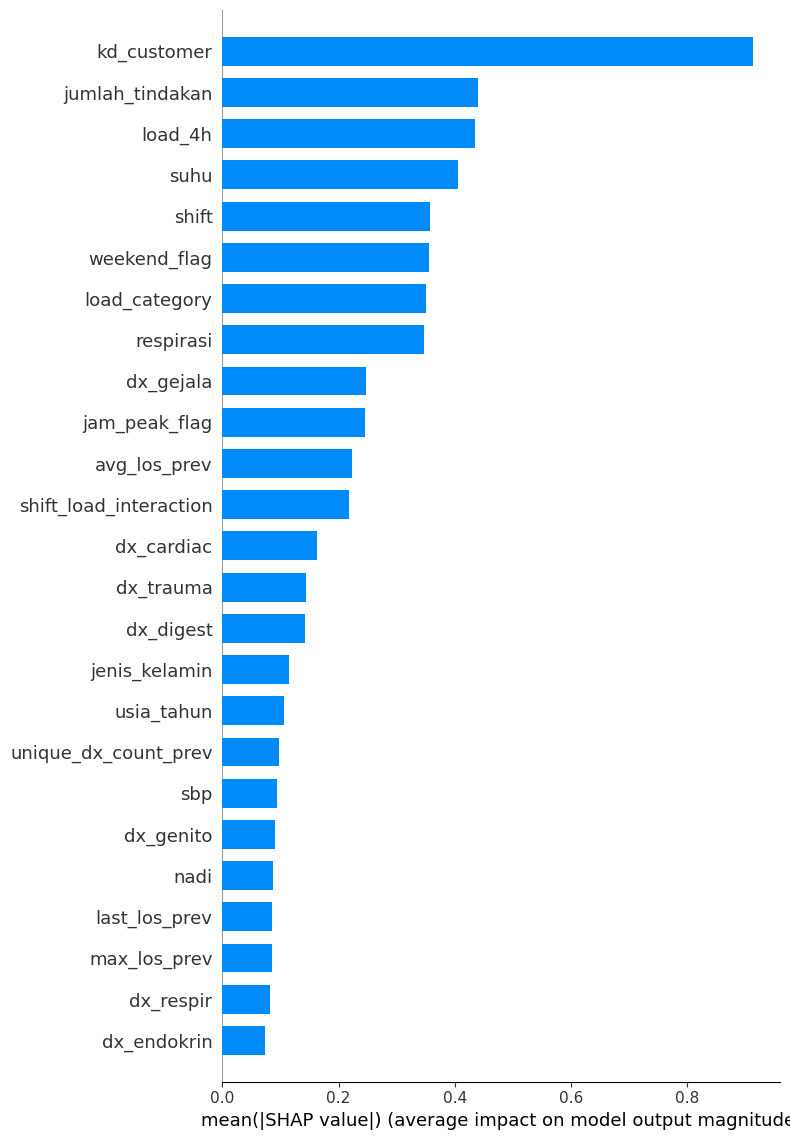

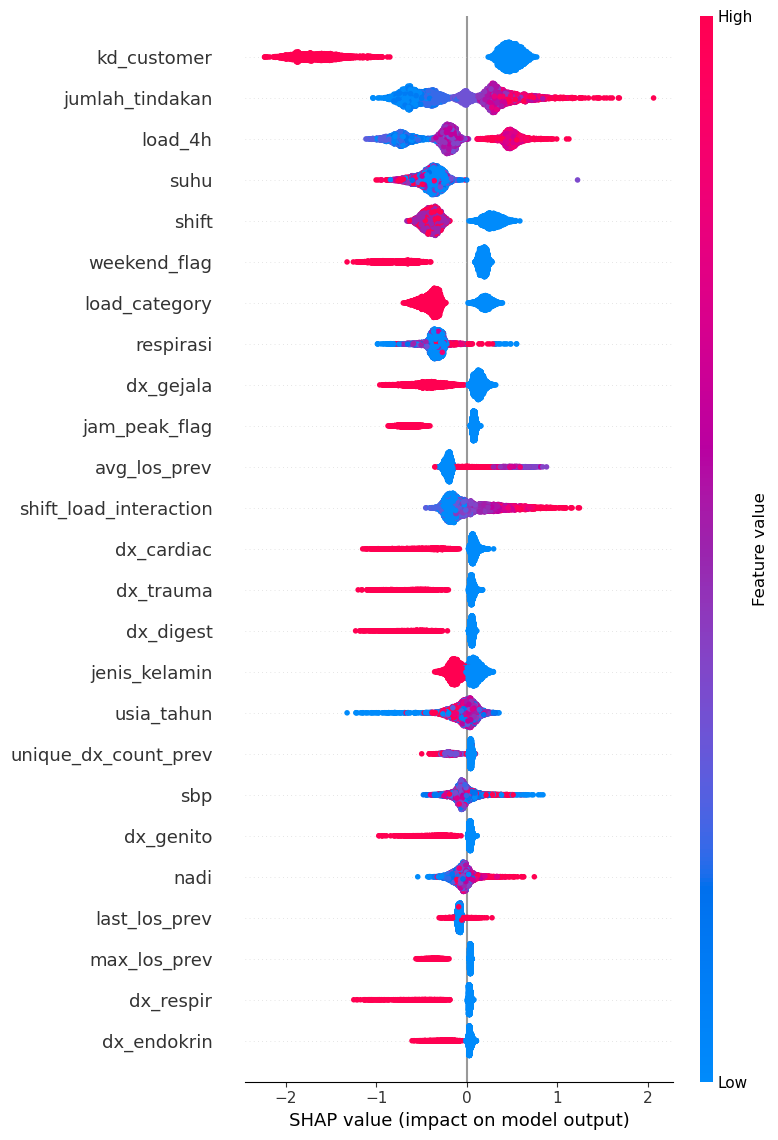

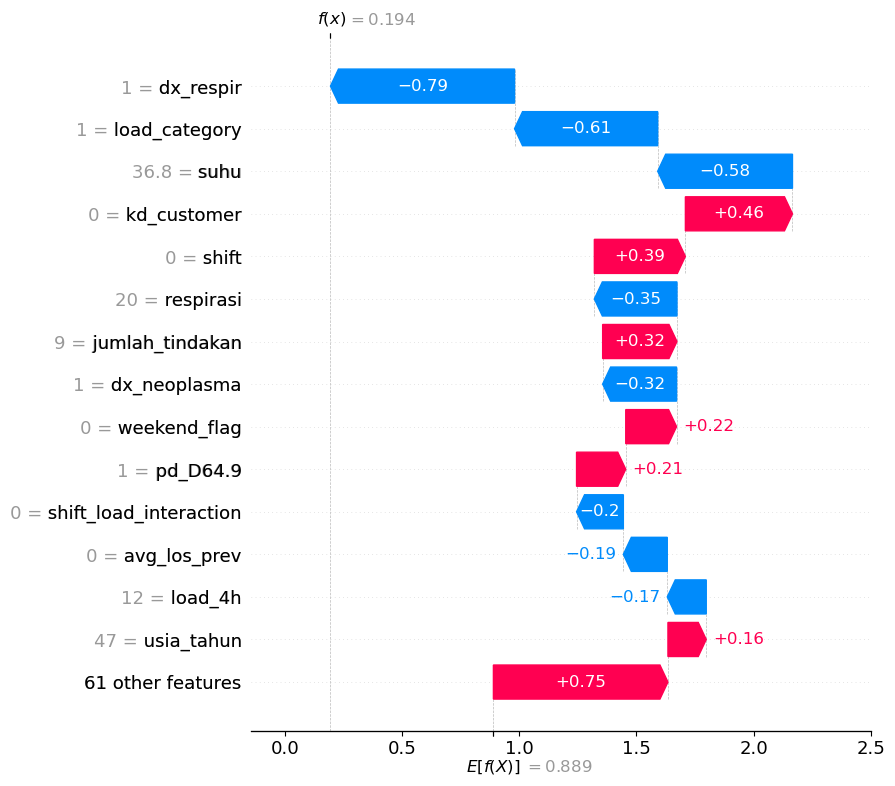

,feature,mean_abs_shap
1,kd_customer,0.913470
8,jumlah_tindakan,0.440462
15,load_4h,0.434416
5,suhu,0.406083
17,shift,0.356522
18,weekend_flag,0.355319
16,load_category,0.349762
4,respirasi,0.346512
36,dx_gejala,0.247632
19,jam_peak_flag,0.245718


In [ ]:
import shap
import numpy as np

explainer = shap.TreeExplainer(final_lgb)

shap_values = explainer.shap_values(X_test_plus)

# kelas 1 = LOS tinggi
shap_values_pos = shap_values

shap.summary_plot(
    shap_values,
    X_test_plus,
    plot_type="bar",
    max_display=25
)

shap.summary_plot(
    shap_values,
    X_test_plus,
    max_display=25
)

# cari indeks true positive
# prediksi final
y_pred_final = (final_lgb.predict_proba(X_test_plus)[:,1] >= 0.30).astype(int)

# indeks true positive
tp_index = np.where((y_test_plus == 1) & (y_pred_final == 1))[0][0]

# waterfall
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[tp_index],
        base_values=explainer.expected_value,
        data=X_test_plus.iloc[tp_index],
        feature_names=X_test_plus.columns
    ),
    max_display=15
)


top_features = (
    np.abs(shap_values).mean(axis=0)
)

shap_importance = (
    pd.DataFrame({
        'feature': X_test_plus.columns,
        'mean_abs_shap': top_features
    })
    .sort_values('mean_abs_shap', ascending=False)
)

shap_importance.head(20)


#### SHAP MODEL B

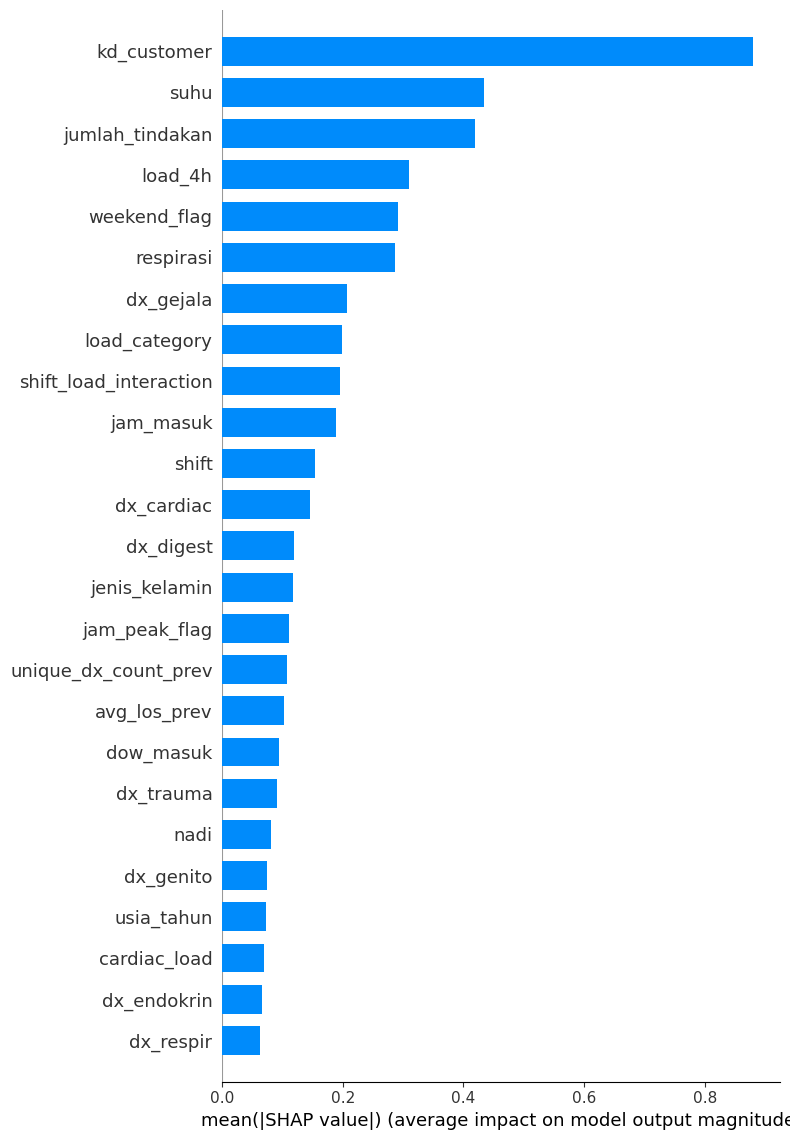

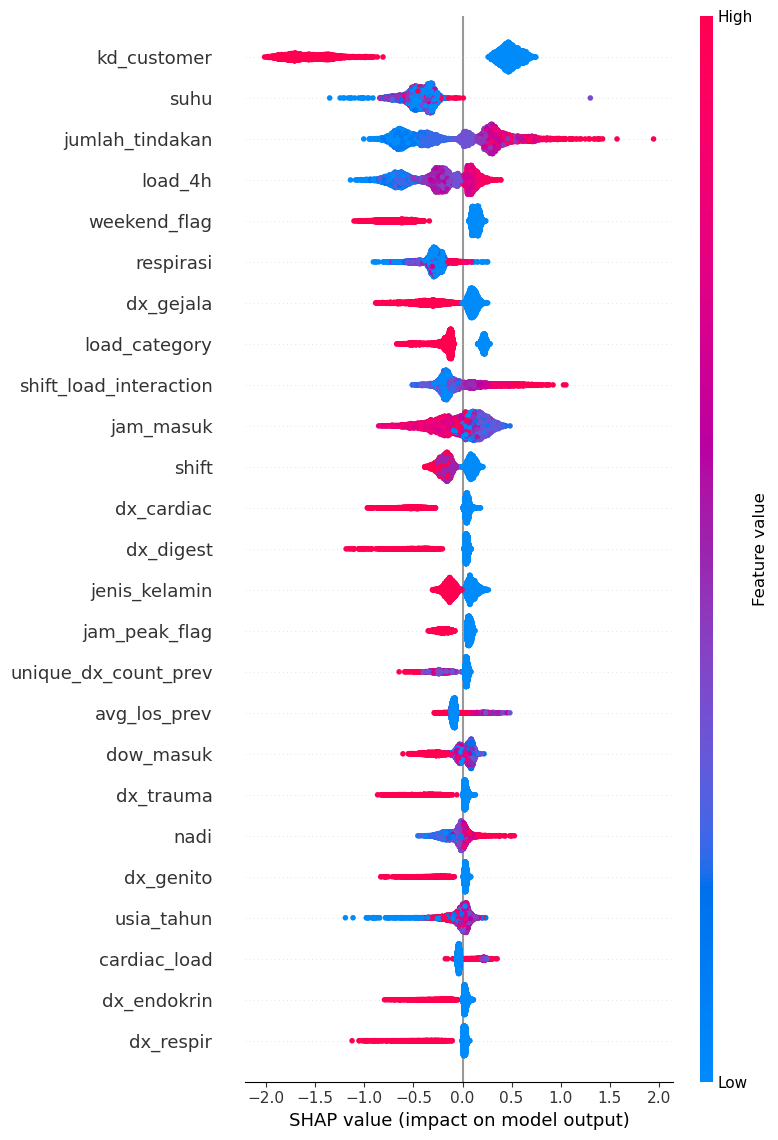

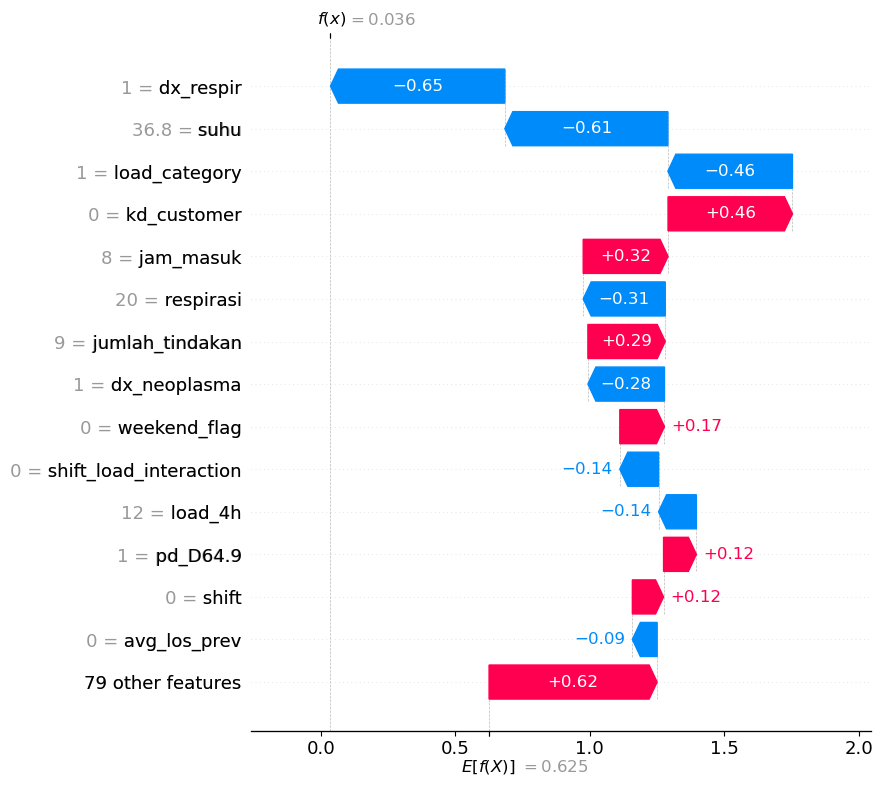

,feature,mean_abs_shap
1,kd_customer,0.880797
5,suhu,0.433653
10,jumlah_tindakan,0.418571
17,load_4h,0.309978
20,weekend_flag,0.292104
4,respirasi,0.286257
38,dx_gejala,0.206978
18,load_category,0.199235
22,shift_load_interaction,0.195750
7,jam_masuk,0.188377


In [ ]:
import shap
import numpy as np

explainerc = shap.TreeExplainer(lgb_basec)

shap_valuesc = explainerc.shap_values(X_test_plusc)

# kelas 1 = LOS tinggi
shap_values_posc = shap_valuesc

shap.summary_plot(
    shap_valuesc,
    X_test_plusc,
    plot_type="bar",
    max_display=25
)

shap.summary_plot(
    shap_valuesc,
    X_test_plusc,
    max_display=25
)

# cari indeks true positive
# prediksi final
y_pred_finalc = (lgb_basec.predict_proba(X_test_plusc)[:,1] >= 0.30).astype(int)

# indeks true positive
tp_indexc = np.where((y_test_plusc == 1) & (y_pred_finalc == 1))[0][0]

# waterfall
shap.plots.waterfall(
    shap.Explanation(
        values=shap_valuesc[tp_indexc],
        base_values=explainerc.expected_value,
        data=X_test_plusc.iloc[tp_indexc],
        feature_names=X_test_plusc.columns
    ),
    max_display=15
)


top_features = (
    np.abs(shap_valuesc).mean(axis=0)
)

shap_importance = (
    pd.DataFrame({
        'feature': X_test_plusc.columns,
        'mean_abs_shap': top_features
    })
    .sort_values('mean_abs_shap', ascending=False)
)

shap_importance.head(20)


### Analisis Dominansi Variabel Administratif (`kd_customer`)

Hasil analisis SHAP menunjukkan bahwa variabel `kd_customer` memiliki nilai *mean absolute SHAP* sebesar 0,88,
secara signifikan lebih tinggi dibandingkan fitur lainnya seperti `suhu` (0,43), `jumlah_tindakan` (0,42), dan `load_4h` (0,31).

Dominansi ini sebagai sinyal sistemik yang tertangkap oleh model dari pola data historis.

Secara metodologis, terdapat dua kemungkinan sumber informasi yang direpresentasikan oleh variabel ini:

#### 1. Informational Signal

Variabel `kd_customer` dapat merepresentasikan perbedaan pola distribusi pasien antar kategori penjamin,
termasuk variasi kompleksitas kasus, alur rujukan, serta pola utilisasi layanan.  
Dalam konteks ini, variabel tersebut membawa sinyal prediktif yang valid terhadap durasi rawat.

#### 2. System-Level Structural Effect

Variabel ini juga berpotensi menangkap dinamika administratif dan operasional sistem pelayanan,
seperti perbedaan prosedur registrasi, proses klaim, atau kebijakan internal,
yang secara tidak langsung memengaruhi panjang rawat pasien.


### Implikasi Metodologis

Distribusi variabel `kd_customer` dalam dataset memang tidak seimbang,
yang mencerminkan proporsi pasien aktual dalam sistem pelayanan rumah sakit.

Dominansi kontribusi SHAP pada variabel ini tidak semata-mata disebabkan oleh ketidakseimbangan distribusi,
melainkan oleh adanya perbedaan probabilitas prolonged LOS antar kategori.

Untuk mengevaluasi tingkat ketergantungan model terhadap variabel administratif ini, dilakukan studi ablasi fitur dengan menghapus `kd_customer` dan melatih ulang model dalam kondisi eksperimen yang identik, dapat dianalisis:

- Seberapa besar penurunan performa model
- Apakah model tetap stabil tanpa fitur administratif dominan
- Apakah fitur klinis dan operasional lainnya mampu mempertahankan diskriminasi secara independen

In [ ]:
# Proporsi LOS tinggi (1) pada tiap jenis penjamin.
pd.crosstab(data['kd_customer'], data['max_los'], normalize='index')



max_los,0.0,1.0
kd_customer,,
0,0.731112,0.268888
1,0.938242,0.061758


Kelompok kd_customer = 0 memiliki 4 kali lipat lebih tinggi risiko LOS ≥ 6 jam
dibanding kd_customer = 1

In [ ]:

#Kalau severity hampir sama, tapi LOS tetap jauh berbeda, maka indikasi faktor administratif.

data.groupby('kd_customer')[[
    'usia_tahun',
    'jumlah_diagnosa',
    'jumlah_tindakan',
    'dx_cardiac',
    'dx_trauma',
    'load_4h'
]].mean()



,usia_tahun,jumlah_diagnosa,jumlah_tindakan,dx_cardiac,dx_trauma,load_4h
kd_customer,,,,,,
0,53.549311,2.575072,7.479141,0.274591,0.129894,13.554758
1,43.912824,1.566642,4.865350,0.074887,0.195988,14.033925


In [ ]:
#Untuk memastikan apakah kd_customer hanya proxy severity atau independent effect. Coba di LOgistic regression

import statsmodels.api as sm

X = data[['usia_tahun','jumlah_diagnosa','jumlah_tindakan','dx_cardiac','dx_trauma','kd_customer']]
y = data['max_los']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.434718
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                max_los   No. Observations:                25126
Model:                          Logit   Df Residuals:                    25119
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Feb 2026   Pseudo R-squ.:                  0.1070
Time:                        17:38:18   Log-Likelihood:                -10923.
converged:                       True   LL-Null:                       -12231.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1780      0.071    -30.886      0.000      -2.316      -2.040
usia_tahun    

## ABLATION kd_customer untuk memastikan

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

THRESHOLD = 0.3

def train_eval_model(X_train, X_test, y_train, y_test, model_name="Model"):
    model = LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= THRESHOLD).astype(int)

    print(f"\n=== {model_name} (Threshold={THRESHOLD}) ===")
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return model


In [ ]:
model_full = train_eval_model(
    X_train_smote,
    X_test_plus,
    y_train_smote,
    y_test_plus,
    "Full Model"
)



=== Full Model (Threshold=0.3) ===
ROC-AUC: 0.7730186159182524
[[3158  911]
 [ 388  569]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      4069
         1.0       0.38      0.59      0.47       957

    accuracy                           0.74      5026
   macro avg       0.64      0.69      0.65      5026
weighted avg       0.79      0.74      0.76      5026



In [ ]:
X_train_noins = X_train_smote.drop(columns=['kd_customer'])
X_test_noins  = X_test_plus.drop(columns=['kd_customer'])

model_noins = train_eval_model(
    X_train_noins,
    X_test_noins,
    y_train_smote,
    y_test_plus,
    "No Insurance"
)



=== No Insurance (Threshold=0.3) ===
ROC-AUC: 0.7531538638732647
[[3251  818]
 [ 429  528]]
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      4069
         1.0       0.39      0.55      0.46       957

    accuracy                           0.75      5026
   macro avg       0.64      0.68      0.65      5026
weighted avg       0.79      0.75      0.77      5026



In [ ]:
X_train_ins = X_train_smote[['kd_customer']]
X_test_ins  = X_test_plus[['kd_customer']]

model_ins = train_eval_model(
    X_train_ins,
    X_test_ins,
    y_train_smote,
    y_test_plus,
    "Insurance Only"
)



=== Insurance Only (Threshold=0.3) ===
ROC-AUC: 0.6547430389008002
[[1727 2342]
 [ 110  847]]
              precision    recall  f1-score   support

         0.0       0.94      0.42      0.58      4069
         1.0       0.27      0.89      0.41       957

    accuracy                           0.51      5026
   macro avg       0.60      0.65      0.50      5026
weighted avg       0.81      0.51      0.55      5026



## REFINE FITUR

In [ ]:
top_features = [
    'kd_customer',
    'jumlah_tindakan',
    'suhu',
    'load_4h',
    'dow_masuk',
    'respirasi',
    'shift',
    'load_category',
    'dx_gejala',
    'jam_masuk',
    'avg_los_prev',
    'dx_cardiac',
    'dx_trauma',
    'dx_digest',
    'jenis_kelamin',
    'usia_tahun',
    'sbp',
    'unique_dx_count_prev',
    'dx_genito',
    'max_los_prev'
]


In [ ]:
X_train_ref = X_train_plus[top_features].copy()
X_test_ref  = X_test_plus[top_features].copy()

print("NaN train:", X_train_ref.isna().sum().sum())
print("NaN test :", X_test_ref.isna().sum().sum())


NaN train: 0
NaN test : 0


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
X_train_ref_sm, y_train_ref_sm = sm.fit_resample(X_train_ref, y_train_plus)


In [ ]:
from lightgbm import LGBMClassifier

lgb_refined = LGBMClassifier(
    n_estimators=866,
    learning_rate=0.02584710637090444,
    num_leaves=38,
    max_depth=10,
    subsample=0.7989174818656724,
    colsample_bytree=0.7859770892571758,
    min_child_samples=73,
    reg_alpha=1.0561057367660753,
    reg_lambda=1.5385350289243553,
    random_state=42,
    verbose=-1
)

lgb_refined.fit(X_train_ref_sm, y_train_ref_sm)

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_prob = lgb_refined.predict_proba(X_test_ref)[:,1]

# pakai threshold operasional terbaikmu
threshold = 0.25
y_pred = (y_prob >= threshold).astype(int)

print("ROC-AUC:", roc_auc_score(y_test_plus, y_prob))
print(confusion_matrix(y_test_plus, y_pred))
print(classification_report(y_test_plus, y_pred))


ROC-AUC: 0.7551713095394929
[[2927 1142]
 [ 327  630]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4069
           1       0.36      0.66      0.46       957

    accuracy                           0.71      5026
   macro avg       0.63      0.69      0.63      5026
weighted avg       0.80      0.71      0.74      5026



In [ ]:
## SHAP REFINE FITUR

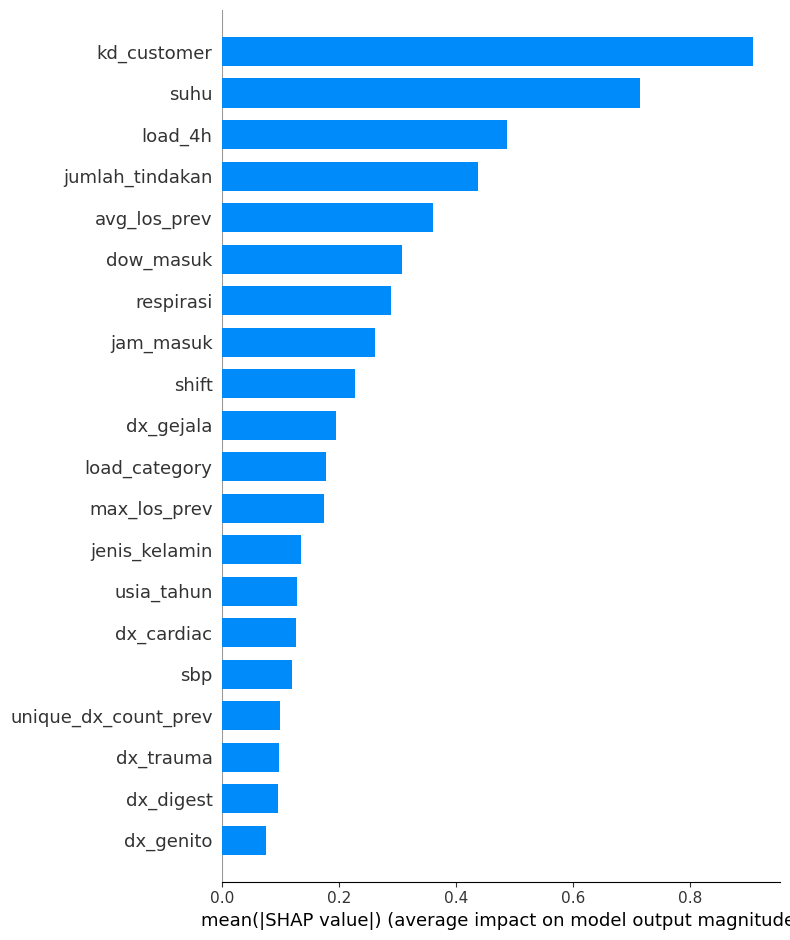

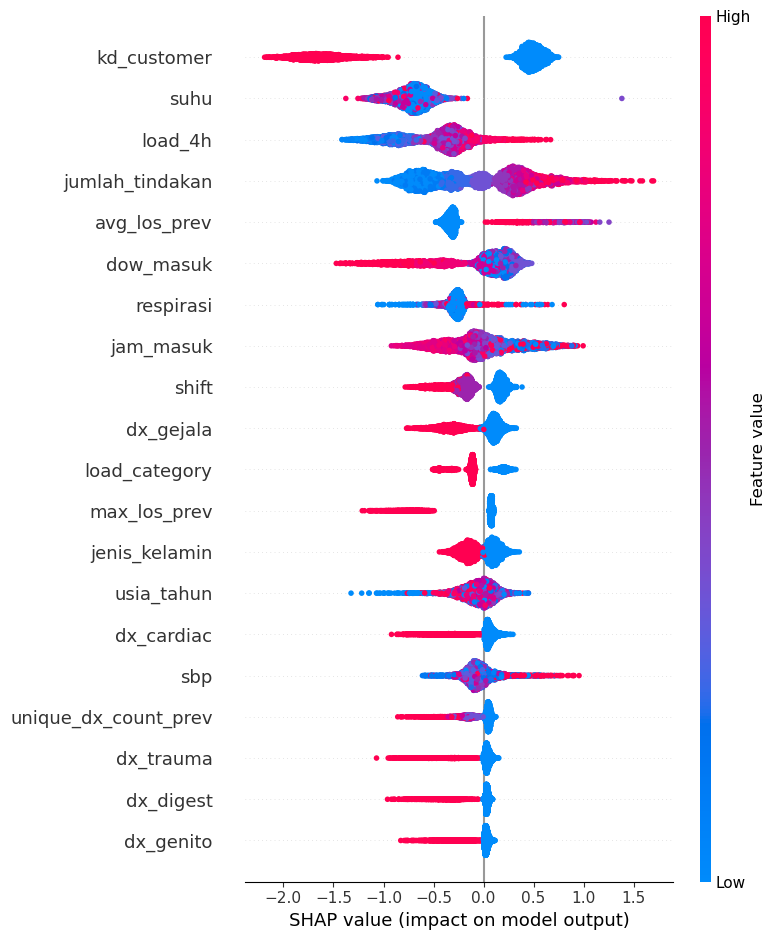

['kd_customer', 'suhu', 'load_4h', 'jumlah_tindakan', 'avg_los_prev', 'dow_masuk', 'respirasi', 'jam_masuk', 'shift', 'dx_gejala', 'load_category', 'max_los_prev', 'jenis_kelamin', 'usia_tahun', 'dx_cardiac', 'sbp', 'unique_dx_count_prev', 'dx_trauma', 'dx_digest', 'dx_genito']


In [ ]:
import shap
import numpy as np
import pandas as pd

# pastikan pakai model refined
explainer = shap.TreeExplainer(lgb_refined)

# shap values untuk class-1 (LOS tinggi)
shap_values = explainer.shap_values(X_test_ref)
shap_pos = shap_values

shap.summary_plot(
    shap_pos,
    X_test_ref,
    plot_type="bar",
    max_display=20
)

shap.summary_plot(
    shap_pos,
    X_test_ref,
    max_display=20
)

shap_importance = (
    np.abs(shap_pos)
    .mean(axis=0)
)

shap_df = pd.DataFrame({
    'feature': X_test_ref.columns,
    'mean_abs_shap': shap_importance
}).sort_values(by='mean_abs_shap', ascending=False)

shap_df.head(20)

print(shap_df['feature'].tolist())

